# **Installation et import package**

In [ ]:
pip install numpy pandas scikit-learn

In [ ]:
pip install shap

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns
import plotly.express as px
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer, SimpleImputer, IterativeImputer
from sklearn.linear_model import LinearRegression
import re
import warnings
import os
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import shap


#   **Importation fichier**

In [ ]:
# Afficher toutes les colonnes
pd.options.display.max_columns = None

In [ ]:
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [ ]:
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimmin

*Filtrer data en fonction des variables pertinentes lié au projet*

In [ ]:
# Les variables choisi
variables = [
    "BuildingType",
    "PrimaryPropertyType",
    'CouncilDistrictCode',
    "Address",
    "ZipCode",
    "Neighborhood",
    "Latitude",
    "Longitude",
    "YearBuilt",
    "NumberofBuildings",
    "PropertyGFATotal",
    "PropertyGFAParking",
    "NumberofFloors",
    "PropertyGFABuilding(s)",
    "LargestPropertyUseType",
    "LargestPropertyUseTypeGFA",
    "ENERGYSTARScore",
    "SiteEUI(kBtu/sf)",
    "DefaultData",
    "SiteEUIWN(kBtu/sf)",
    "SourceEUI(kBtu/sf)",
    "SourceEUIWN(kBtu/sf)",
    "SiteEnergyUse(kBtu)",
    "SiteEnergyUseWN(kBtu)",
    "SteamUse(kBtu)",
    "Electricity(kWh)",
    "Electricity(kBtu)",
    "NaturalGas(therms)",
    "ComplianceStatus",
    "TotalGHGEmissions",
    "GHGEmissionsIntensity",
    	"Outlier",
]

# Filtrer le DataFrame pour ne conserver que les variables pertinentes
data_pertinent = data[variables]

# Afficher les premières lignes du DataFrame filtré pour vérifier
data_pertinent

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Address,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,PropertyGFATotal,PropertyGFAParking,NumberofFloors,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),DefaultData,SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,Outlier
0,NonResidential,Hotel,7,405 Olive way,98101.0,DOWNTOWN,47.61220,-122.33799,1927,1.0,88434,0,12,88434,Hotel,88434.0,60.0,81.699997,False,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,Compliant,249.98,2.83,NaN
1,NonResidential,Hotel,7,724 Pine street,98101.0,DOWNTOWN,47.61317,-122.33393,1996,1.0,103566,15064,11,88502,Hotel,83880.0,61.0,94.800003,False,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,Compliant,295.86,2.86,NaN
2,NonResidential,Hotel,7,1900 5th Avenue,98101.0,DOWNTOWN,47.61393,-122.33810,1969,1.0,956110,196718,41,759392,Hotel,756493.0,43.0,96.000000,False,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,Compliant,2089.28,2.19,NaN
3,NonResidential,Hotel,7,620 STEWART ST,98101.0,DOWNTOWN,47.61412,-122.33664,1926,1.0,61320,0,10,61320,Hotel,61320.0,56.0,110.800003,False,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,Compliant,286.43,4.67,NaN
4,NonResidential,Hotel,7,401 LENORA ST,98121.0,DOWNTOWN,47.61375,-122.34047,1980,1.0,175580,62000,18,113580,Hotel,123445.0,75.0,114.800003,False,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,Compliant,505.01,2.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,2,1600 S Dakota St,NaN,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,12294,0,1,12294,Office,12294.0,46.0,69.099998,True,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,Error - Correct Default Data,20.94,1.70,NaN
3372,Nonresidential COS,Other,2,719 8th Ave S,NaN,DOWNTOWN,47.59625,-122.32283,2004,1.0,16000,0,1,16000,Other - Recreation,16000.0,NaN,59.400002,False,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,Compliant,32.17,2.01,NaN
3373,Nonresidential COS,Other,7,1920 1st Ave W,NaN,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,13157,0,1,13157,Other - Recreation,7583.0,NaN,438.200012,False,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,Compliant,223.54,16.99,NaN
3374,Nonresidential COS,Mixed Use Property,1,8319 8th Ave S,NaN,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,14101,0,1,14101,Other - Recreation,6601.0,NaN,51.000000,False,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,Compliant,22.11,1.57,NaN


*filtrer data_pertinent en fonction des logement non residentiel **(NonResidential)** dans la variable BuildingType*

In [ ]:
data_pertinent["BuildingType"].value_counts()

,count
BuildingType,
NonResidential,1460
Multifamily LR (1-4),1018
Multifamily MR (5-9),580
Multifamily HR (10+),110
SPS-District K-12,98
Nonresidential COS,85
Campus,24
Nonresidential WA,1


In [ ]:
# Filtrage des données où BuildingType est NonResidential
data_pertinent = data_pertinent[data_pertinent['BuildingType'] == 'NonResidential']

In [ ]:
data_pertinent

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Address,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,PropertyGFATotal,PropertyGFAParking,NumberofFloors,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),DefaultData,SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,Outlier
0,NonResidential,Hotel,7,405 Olive way,98101.0,DOWNTOWN,47.61220,-122.33799,1927,1.0,88434,0,12,88434,Hotel,88434.0,60.0,81.699997,False,84.300003,182.500000,189.000000,7226362.50,7.456910e+06,2003882.00,1.156514e+06,3946027.0,12764.52930,Compliant,249.98,2.83,NaN
1,NonResidential,Hotel,7,724 Pine street,98101.0,DOWNTOWN,47.61317,-122.33393,1996,1.0,103566,15064,11,88502,Hotel,83880.0,61.0,94.800003,False,97.900002,176.100006,179.399994,8387933.00,8.664479e+06,0.00,9.504252e+05,3242851.0,51450.81641,Compliant,295.86,2.86,NaN
2,NonResidential,Hotel,7,1900 5th Avenue,98101.0,DOWNTOWN,47.61393,-122.33810,1969,1.0,956110,196718,41,759392,Hotel,756493.0,43.0,96.000000,False,97.699997,241.899994,244.100006,72587024.00,7.393711e+07,21566554.00,1.451544e+07,49526664.0,14938.00000,Compliant,2089.28,2.19,NaN
3,NonResidential,Hotel,7,620 STEWART ST,98101.0,DOWNTOWN,47.61412,-122.33664,1926,1.0,61320,0,10,61320,Hotel,61320.0,56.0,110.800003,False,113.300003,216.199997,224.000000,6794584.00,6.946800e+06,2214446.25,8.115253e+05,2768924.0,18112.13086,Compliant,286.43,4.67,NaN
4,NonResidential,Hotel,7,401 LENORA ST,98121.0,DOWNTOWN,47.61375,-122.34047,1980,1.0,175580,62000,18,113580,Hotel,123445.0,75.0,114.800003,False,118.699997,211.399994,215.600006,14172606.00,1.465650e+07,0.00,1.573449e+06,5368607.0,88039.98438,Compliant,505.01,2.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,NonResidential,Warehouse,2,6518 Ellis,98108.0,GREATER DUWAMISH,47.54425,-122.31776,1955,1.0,52085,4222,1,47863,Non-Refrigerated Warehouse,52085.0,37.0,69.199997,False,80.300003,102.099998,114.599998,3605855.50,4.182622e+06,0.00,2.147724e+05,732803.0,28730.51953,Compliant,157.70,3.03,NaN
3339,NonResidential,Small- and Mid-Sized Office,2,7277 Perimeter Rd.,98108.0,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,24990,0,2,24990,Office,24990.0,9.0,176.899994,False,189.300003,367.000000,378.700012,4420650.50,4.731814e+06,0.00,6.351199e+05,2167029.0,22536.21094,Compliant,134.80,5.39,NaN
3340,NonResidential,Other,4,7135 Sportsfield Drive NE,98155.0,NORTHEAST,47.68109,-122.26180,2013,1.0,72000,0,1,72000,Other - Recreation,72000.0,NaN,40.599998,False,44.400002,97.900002,101.800003,2925780.00,3.198858e+06,0.00,5.573329e+05,1901620.0,10241.59961,Compliant,67.65,0.94,NaN
3347,NonResidential,K-12 School,3,1701 20th Ave South,98144.0,GREATER DUWAMISH,47.58831,-122.30650,2015,1.0,45000,0,3,45000,K-12 School,45728.0,77.0,29.000000,False,30.600000,91.099998,96.000000,1325972.75,1.397742e+06,0.00,3.886204e+05,1325973.0,0.00000,Compliant,9.24,0.21,NaN


*suprimer les ligne ou la cible SiteEUI(kBtu/sf) est NaN*

In [ ]:
data_pertinent = data_pertinent.dropna(subset=['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)'])


*Traittement des outliers

In [ ]:
# Supprimer les lignes où 'Outlier' est égal à 'Low outlier' ou 'High outlier'
data_pertinent = data_pertinent[(data_pertinent['Outlier'] != 'Low outlier') & (data_pertinent['Outlier'] != 'High outlier')]

*Suprimer les NaN*

In [ ]:
# Calculer le taux de remplissage des colonnes
missing_values = data_pertinent.isnull().mean() * 100
print(missing_values)

BuildingType                   0.000000
PrimaryPropertyType            0.000000
CouncilDistrictCode            0.000000
Address                        0.000000
ZipCode                        0.000000
Neighborhood                   0.000000
Latitude                       0.000000
Longitude                      0.000000
YearBuilt                      0.000000
NumberofBuildings              0.000000
PropertyGFATotal               0.000000
PropertyGFAParking             0.000000
NumberofFloors                 0.000000
PropertyGFABuilding(s)         0.000000
LargestPropertyUseType         0.277585
LargestPropertyUseTypeGFA      0.277585
ENERGYSTARScore               31.714087
SiteEUI(kBtu/sf)               0.000000
DefaultData                    0.000000
SiteEUIWN(kBtu/sf)             0.000000
SourceEUI(kBtu/sf)             0.000000
SourceEUIWN(kBtu/sf)           0.000000
SiteEnergyUse(kBtu)            0.000000
SiteEnergyUseWN(kBtu)          0.000000
SteamUse(kBtu)                 0.000000


*Ajout de la colonne 'TotalSurface*

In [ ]:
# Ajout de la colonne 'TotalSurface'
data_pertinent['TotalSurface'] = data_pertinent['NumberofFloors'] * data_pertinent['PropertyGFATotal']

# Affichage des premières lignes pour vérifier
display(data_pertinent.head())

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Address,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,PropertyGFATotal,PropertyGFAParking,NumberofFloors,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),DefaultData,SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,Outlier,TotalSurface
0,NonResidential,Hotel,7,405 Olive way,98101.0,DOWNTOWN,47.61220,-122.33799,1927,1.0,88434,0,12,88434,Hotel,88434.0,60.0,81.699997,False,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,Compliant,249.98,2.83,NaN,1061208
1,NonResidential,Hotel,7,724 Pine street,98101.0,DOWNTOWN,47.61317,-122.33393,1996,1.0,103566,15064,11,88502,Hotel,83880.0,61.0,94.800003,False,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,Compliant,295.86,2.86,NaN,1139226
2,NonResidential,Hotel,7,1900 5th Avenue,98101.0,DOWNTOWN,47.61393,-122.33810,1969,1.0,956110,196718,41,759392,Hotel,756493.0,43.0,96.000000,False,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,Compliant,2089.28,2.19,NaN,39200510
3,NonResidential,Hotel,7,620 STEWART ST,98101.0,DOWNTOWN,47.61412,-122.33664,1926,1.0,61320,0,10,61320,Hotel,61320.0,56.0,110.800003,False,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,Compliant,286.43,4.67,NaN,613200
4,NonResidential,Hotel,7,401 LENORA ST,98121.0,DOWNTOWN,47.61375,-122.34047,1980,1.0,175580,62000,18,113580,Hotel,123445.0,75.0,114.800003,False,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,Compliant,505.01,2.88,NaN,3160440


In [ ]:
data_pertinent = data_pertinent.dropna(subset=['NumberofBuildings', 'TotalGHGEmissions', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA'])


## **Effectuons les test de Normalité**

*Test de Shapiro-Wilk*

In [ ]:
from scipy.stats import kstest, norm, shapiro
# Test de Shapiro-Wilk
statistic_shapiro, p_value_shapiro = shapiro(data_pertinent['TotalGHGEmissions'])
print('Statistique de test Shapiro-Wilk:', statistic_shapiro)
print('p-value:', p_value_shapiro)

if p_value_shapiro > 0.05:
    print("Les données suivent une distribution normale (ne rejetez pas H0)")
else:
    print("Les données ne suivent pas une distribution normale (rejetez H0)")

Statistique de test Shapiro-Wilk: 0.21463574549332132
p-value: 6.909228650194904e-61
Les données ne suivent pas une distribution normale (rejetez H0)


In [ ]:
from scipy.stats import shapiro

# Liste des variables numériques à tester
numeric = [

    'NumberofBuildings',
    'PropertyGFATotal',
    'NumberofFloors',
    'PropertyGFABuilding(s)',
    'LargestPropertyUseTypeGFA',
    'TotalSurface',
]

# Initialisation d'un dictionnaire pour stocker les résultats
results = {}

# Boucle sur chaque variable numérique
for var in numeric:
    # Vérification que la variable existe dans le DataFrame
    if var in data_pertinent.columns:
        # Test de Shapiro-Wilk
        statistic_shapiro, p_value_shapiro = shapiro(data_pertinent[var].dropna())  # dropna() pour ignorer les valeurs NaN
        # Stockage des résultats
        results[var] = {'Statistic': statistic_shapiro, 'p-value': p_value_shapiro}

        # Affichage des résultats
        print(f'Variable: {var}')
        print('Statistique de test Shapiro-Wilk:', statistic_shapiro)
        print('p-value:', p_value_shapiro)

        if p_value_shapiro > 0.05:
            print("Les données suivent une distribution normale (ne rejetez pas H0)")
        else:
            print("Les données ne suivent pas une distribution normale (rejetez H0)")
        print('-' * 50)  # Séparateur entre les résultats de chaque variable


Variable: NumberofBuildings
Statistique de test Shapiro-Wilk: 0.19133492638745997
p-value: 2.0536963564047433e-61
Les données ne suivent pas une distribution normale (rejetez H0)
--------------------------------------------------
Variable: PropertyGFATotal
Statistique de test Shapiro-Wilk: 0.4792808821882921
p-value: 9.955811258790086e-54
Les données ne suivent pas une distribution normale (rejetez H0)
--------------------------------------------------
Variable: NumberofFloors
Statistique de test Shapiro-Wilk: 0.4659807219994039
p-value: 3.7324763857053473e-54
Les données ne suivent pas une distribution normale (rejetez H0)
--------------------------------------------------
Variable: PropertyGFABuilding(s)
Statistique de test Shapiro-Wilk: 0.4563673516262985
p-value: 1.8600890091888383e-54
Les données ne suivent pas une distribution normale (rejetez H0)
--------------------------------------------------
Variable: LargestPropertyUseTypeGFA
Statistique de test Shapiro-Wilk: 0.46526217430

*Les résultats du test de Shapiro-Wilk pour les variables montrent que toutes les variables testées ne suivent pas une distribution normale.*

* Le test de Kolmogorov-Smirnov*

In [ ]:
from scipy.stats import kstest, norm
import numpy as np

# Liste des variables numériques à tester
numeric = [

    'NumberofBuildings',
    'PropertyGFATotal',
    'NumberofFloors',
    'PropertyGFABuilding(s)',
    'LargestPropertyUseTypeGFA',
    'TotalSurface',
]

# Boucle sur chaque variable numérique
for var in numeric:
    # Vérification que la variable existe dans le DataFrame
    if var in data_pertinent.columns:
        # Standardiser les données
        data_standardized = (data_pertinent[var] - np.mean(data_pertinent[var])) / np.std(data_pertinent[var])

        # Test de Kolmogorov-Smirnov
        d, p_value_ks = kstest(data_standardized.dropna(), 'norm')  

        # Affichage des résultats
        print(f'Variable: {var}')
        print('Statistique de test Kolmogorov-Smirnov:', d)
        print('p-value:', p_value_ks)

        if p_value_ks > 0.05:
            print("Les données suivent une distribution normale (ne rejetez pas H0)")
        else:
            print("Les données ne suivent pas une distribution normale (rejetez H0)")
        print('-' * 50)  


Variable: NumberofBuildings
Statistique de test Kolmogorov-Smirnov: 0.5004222538356096
p-value: 0.0
Les données ne suivent pas une distribution normale (rejetez H0)
--------------------------------------------------
Variable: PropertyGFATotal
Statistique de test Kolmogorov-Smirnov: 0.3122602069285017
p-value: 5.489345159659546e-125
Les données ne suivent pas une distribution normale (rejetez H0)
--------------------------------------------------
Variable: NumberofFloors
Statistique de test Kolmogorov-Smirnov: 0.3004878664144808
p-value: 1.419054190014007e-115
Les données ne suivent pas une distribution normale (rejetez H0)
--------------------------------------------------
Variable: PropertyGFABuilding(s)
Statistique de test Kolmogorov-Smirnov: 0.3112564903890973
p-value: 3.609740121193228e-124
Les données ne suivent pas une distribution normale (rejetez H0)
--------------------------------------------------
Variable: LargestPropertyUseTypeGFA
Statistique de test Kolmogorov-Smirnov: 0.

*Les résultats du test de Kolmogorov-Smirnov (KS) pour les variables testées montrent clairement que toutes les variables ne suivent pas une distribution normale aussi.*

In [ ]:
! pip install pingouin

**Test Anova**

*TotalGHGEmissions vs TotalSurface*

In [ ]:
# Comparaison des protéines par 100g ('proteins_100g') entre les groupes définis par 'nutrition_grade_fr'
import pingouin as pg



# Comparaison des émissions totales de GES ('TotalGHGEmissions') entre les groupes définis par la surface totale ('TotalSurface')
aov_custom = pg.anova(data=data_pertinent, dv='TotalGHGEmissions', between='TotalSurface', detailed=True)

# Affichage des résultats
print(aov_custom)

         Source            SS    DF             MS         F         p-unc  \
0  TotalSurface  4.970868e+08  1386  358648.501495  6.074295  3.859919e-12   
1        Within  2.952182e+06    50   59043.640443       NaN           NaN   

        np2  
0  0.994096  
1       NaN  


*Ces résultats suggèrent qu'il existe une forte relation entre la surface totale du bâtiment (TotalSurface) et les émissions totales de gaz à effet de serre (TotalGHGEmissions).*

**Anova entre 'TotalGHGEmissions' vs toutes les variable choisi**

In [ ]:
import pingouin as pg

# Listes des variables numériques et catégorielles
vari_numeric = [

    'NumberofBuildings',
    'PropertyGFATotal',
    'NumberofFloors',
    'PropertyGFABuilding(s)',
    'LargestPropertyUseTypeGFA',
    'TotalSurface',
]

vari_categorielles = [
    'BuildingType',
    'PrimaryPropertyType',
    'Neighborhood',
    'LargestPropertyUseType',
]

# Boucle sur chaque combinaison de variable numérique et catégorielle
for num_var in vari_numeric:
    for cat_var in vari_categorielles:
        if num_var in data_pertinent.columns and cat_var in data_pertinent.columns:
            # Exécuter l'ANOVA pour TotalGHGEmissions en fonction des variables catégorielles
            aov_result = pg.anova(
                data=data_pertinent.dropna(subset=['TotalGHGEmissions', cat_var]),
                dv='TotalGHGEmissions',
                between=cat_var,
                detailed=True
            )

            # Afficher les résultats de l'ANOVA
            print(f'ANOVA pour TotalGHGEmissions en fonction de {cat_var} (sans covariable)')
            print(aov_result)
            print('-' * 50)


ANOVA pour TotalGHGEmissions en fonction de BuildingType (sans covariable)
         Source            SS    DF            MS    F           np2
0  BuildingType  1.160799e-24     0           inf  inf  2.321418e-33
1        Within  5.000390e+08  1436  3.482166e+05  NaN           NaN
--------------------------------------------------
ANOVA pour TotalGHGEmissions en fonction de PrimaryPropertyType (sans covariable)


/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1


                Source            SS    DF            MS          F  \
0  PrimaryPropertyType  2.596429e+08    20  1.298214e+07  76.468438   
1               Within  2.403961e+08  1416  1.697713e+05        NaN   

           p-unc       np2  
0  2.308822e-208  0.519245  
1            NaN       NaN  
--------------------------------------------------
ANOVA pour TotalGHGEmissions en fonction de Neighborhood (sans covariable)
         Source            SS    DF            MS         F     p-unc  \
0  Neighborhood  1.692224e+07    17  995425.75312  2.923743  0.000058   
1        Within  4.831168e+08  1419  340462.83812       NaN       NaN   

        np2  
0  0.033842  
1       NaN  
--------------------------------------------------
ANOVA pour TotalGHGEmissions en fonction de LargestPropertyUseType (sans covariable)
                   Source            SS    DF            MS          F  \
0  LargestPropertyUseType  2.625465e+08    49  5.358092e+06  31.292251   
1                  Within  

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1
/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1


                   Source            SS    DF            MS          F  \
0  LargestPropertyUseType  2.625465e+08    49  5.358092e+06  31.292251   
1                  Within  2.374925e+08  1387  1.712275e+05        NaN   

           p-unc       np2  
0  1.083204e-187  0.525052  
1            NaN       NaN  
--------------------------------------------------
ANOVA pour TotalGHGEmissions en fonction de BuildingType (sans covariable)
         Source            SS    DF            MS    F           np2
0  BuildingType  1.160799e-24     0           inf  inf  2.321418e-33
1        Within  5.000390e+08  1436  3.482166e+05  NaN           NaN
--------------------------------------------------
ANOVA pour TotalGHGEmissions en fonction de PrimaryPropertyType (sans covariable)
                Source            SS    DF            MS          F  \
0  PrimaryPropertyType  2.596429e+08    20  1.298214e+07  76.468438   
1               Within  2.403961e+08  1416  1.697713e+05        NaN   

          

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1


ANOVA pour TotalGHGEmissions en fonction de PrimaryPropertyType (sans covariable)
                Source            SS    DF            MS          F  \
0  PrimaryPropertyType  2.596429e+08    20  1.298214e+07  76.468438   
1               Within  2.403961e+08  1416  1.697713e+05        NaN   

           p-unc       np2  
0  2.308822e-208  0.519245  
1            NaN       NaN  
--------------------------------------------------
ANOVA pour TotalGHGEmissions en fonction de Neighborhood (sans covariable)
         Source            SS    DF            MS         F     p-unc  \
0  Neighborhood  1.692224e+07    17  995425.75312  2.923743  0.000058   
1        Within  4.831168e+08  1419  340462.83812       NaN       NaN   

        np2  
0  0.033842  
1       NaN  
--------------------------------------------------
ANOVA pour TotalGHGEmissions en fonction de LargestPropertyUseType (sans covariable)
                   Source            SS    DF            MS          F  \
0  LargestPropertyU

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1


ANOVA pour TotalGHGEmissions en fonction de LargestPropertyUseType (sans covariable)
                   Source            SS    DF            MS          F  \
0  LargestPropertyUseType  2.625465e+08    49  5.358092e+06  31.292251   
1                  Within  2.374925e+08  1387  1.712275e+05        NaN   

           p-unc       np2  
0  1.083204e-187  0.525052  
1            NaN       NaN  
--------------------------------------------------
ANOVA pour TotalGHGEmissions en fonction de BuildingType (sans covariable)
         Source            SS    DF            MS    F           np2
0  BuildingType  1.160799e-24     0           inf  inf  2.321418e-33
1        Within  5.000390e+08  1436  3.482166e+05  NaN           NaN
--------------------------------------------------
ANOVA pour TotalGHGEmissions en fonction de PrimaryPropertyType (sans covariable)
                Source            SS    DF            MS          F  \
0  PrimaryPropertyType  2.596429e+08    20  1.298214e+07  76.468438 

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1006: RuntimeWarning: divide by zero encountered in scalar divide
  msbetween = ssbetween / ddof1


ANOVA pour TotalGHGEmissions en fonction de LargestPropertyUseType (sans covariable)
                   Source            SS    DF            MS          F  \
0  LargestPropertyUseType  2.625465e+08    49  5.358092e+06  31.292251   
1                  Within  2.374925e+08  1387  1.712275e+05        NaN   

           p-unc       np2  
0  1.083204e-187  0.525052  
1            NaN       NaN  
--------------------------------------------------


**Anova entre 'SiteEnergyUseWN(kBtu)' vs toutes les variable choisi**

In [ ]:
import pingouin as pg

# Listes des variables numériques et catégorielles
vari_numeric = [

    'NumberofBuildings',
    'PropertyGFATotal',
    'NumberofFloors',
    'PropertyGFABuilding(s)',
    'LargestPropertyUseTypeGFA',
    'TotalSurface',
]

vari_categorielles = [
    'BuildingType',
    'PrimaryPropertyType',
    'Neighborhood',
    'LargestPropertyUseType',
]

# Boucle sur chaque combinaison de variable numérique et catégorielle
for num_var in vari_numeric:
    for cat_var in vari_categorielles:
        if num_var in data_pertinent.columns and cat_var in data_pertinent.columns:
            # Exécuter l'ANOVA pour SiteEnergyUseWN(kBtu)
            aov_result = pg.anova(
                data=data_pertinent.dropna(subset=['SiteEnergyUseWN(kBtu)', num_var, cat_var]),
                dv='SiteEnergyUseWN(kBtu)',
                between=cat_var,
                detailed=True
            )

            # Afficher les résultats de l'ANOVA
            print(f'ANOVA pour SiteEnergyUseWN(kBtu) en fonction de {cat_var}')
            print(aov_result)
            print('-' * 50)


ANOVA pour SiteEnergyUseWN(kBtu) en fonction de BuildingType
         Source            SS    DF            MS  np2
0  BuildingType  0.000000e+00     0           NaN  0.0
1        Within  5.376217e+17  1436  3.743884e+14  NaN
--------------------------------------------------
ANOVA pour SiteEnergyUseWN(kBtu) en fonction de PrimaryPropertyType
                Source            SS    DF            MS          F  \
0  PrimaryPropertyType  2.215343e+17    20  1.107671e+16  49.621159   
1               Within  3.160875e+17  1416  2.232256e+14        NaN   

           p-unc       np2  
0  2.221146e-147  0.412063  
1            NaN       NaN  
--------------------------------------------------
ANOVA pour SiteEnergyUseWN(kBtu) en fonction de Neighborhood
         Source            SS    DF            MS         F     p-unc  \
0  Neighborhood  2.045478e+16    17  1.203222e+15  3.301395  0.000006   
1        Within  5.171670e+17  1419  3.644588e+14       NaN       NaN   

        np2  
0  0.038

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  msbetween = ssbetween / ddof1



--------------------------------------------------
ANOVA pour SiteEnergyUseWN(kBtu) en fonction de LargestPropertyUseType
                   Source            SS    DF            MS          F  \
0  LargestPropertyUseType  2.437862e+17    49  4.975228e+15  23.484703   
1                  Within  2.938356e+17  1387  2.118497e+14        NaN   

           p-unc       np2  
0  6.819476e-147  0.453453  
1            NaN       NaN  
--------------------------------------------------
ANOVA pour SiteEnergyUseWN(kBtu) en fonction de BuildingType
         Source            SS    DF            MS  np2
0  BuildingType  0.000000e+00     0           NaN  0.0
1        Within  5.376217e+17  1436  3.743884e+14  NaN
--------------------------------------------------
ANOVA pour SiteEnergyUseWN(kBtu) en fonction de PrimaryPropertyType
                Source            SS    DF            MS          F  \
0  PrimaryPropertyType  2.215343e+17    20  1.107671e+16  49.621159   
1               Within  3.160

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  msbetween = ssbetween / ddof1


ANOVA pour SiteEnergyUseWN(kBtu) en fonction de LargestPropertyUseType
                   Source            SS    DF            MS          F  \
0  LargestPropertyUseType  2.437862e+17    49  4.975228e+15  23.484703   
1                  Within  2.938356e+17  1387  2.118497e+14        NaN   

           p-unc       np2  
0  6.819476e-147  0.453453  
1            NaN       NaN  
--------------------------------------------------
ANOVA pour SiteEnergyUseWN(kBtu) en fonction de BuildingType
         Source            SS    DF            MS  np2
0  BuildingType  0.000000e+00     0           NaN  0.0
1        Within  5.376217e+17  1436  3.743884e+14  NaN
--------------------------------------------------
ANOVA pour SiteEnergyUseWN(kBtu) en fonction de PrimaryPropertyType
                Source            SS    DF            MS          F  \
0  PrimaryPropertyType  2.215343e+17    20  1.107671e+16  49.621159   
1               Within  3.160875e+17  1416  2.232256e+14        NaN   

         

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  msbetween = ssbetween / ddof1
/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  msbetween = ssbetween / ddof1


ANOVA pour SiteEnergyUseWN(kBtu) en fonction de Neighborhood
         Source            SS    DF            MS         F     p-unc  \
0  Neighborhood  2.045478e+16    17  1.203222e+15  3.301395  0.000006   
1        Within  5.171670e+17  1419  3.644588e+14       NaN       NaN   

        np2  
0  0.038047  
1       NaN  
--------------------------------------------------
ANOVA pour SiteEnergyUseWN(kBtu) en fonction de LargestPropertyUseType
                   Source            SS    DF            MS          F  \
0  LargestPropertyUseType  2.437862e+17    49  4.975228e+15  23.484703   
1                  Within  2.938356e+17  1387  2.118497e+14        NaN   

           p-unc       np2  
0  6.819476e-147  0.453453  
1            NaN       NaN  
--------------------------------------------------
ANOVA pour SiteEnergyUseWN(kBtu) en fonction de BuildingType
         Source            SS    DF            MS  np2
0  BuildingType  0.000000e+00     0           NaN  0.0
1        Within  5.3762

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  msbetween = ssbetween / ddof1
/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1006: RuntimeWarning: invalid value encountered in scalar divide
  msbetween = ssbetween / ddof1


                   Source            SS    DF            MS          F  \
0  LargestPropertyUseType  2.437862e+17    49  4.975228e+15  23.484703   
1                  Within  2.938356e+17  1387  2.118497e+14        NaN   

           p-unc       np2  
0  6.819476e-147  0.453453  
1            NaN       NaN  
--------------------------------------------------
ANOVA pour SiteEnergyUseWN(kBtu) en fonction de BuildingType
         Source            SS    DF            MS  np2
0  BuildingType  0.000000e+00     0           NaN  0.0
1        Within  5.376217e+17  1436  3.743884e+14  NaN
--------------------------------------------------
ANOVA pour SiteEnergyUseWN(kBtu) en fonction de PrimaryPropertyType
                Source            SS    DF            MS          F  \
0  PrimaryPropertyType  2.215343e+17    20  1.107671e+16  49.621159   
1               Within  3.160875e+17  1416  2.232256e+14        NaN   

           p-unc       np2  
0  2.221146e-147  0.412063  
1            NaN      

#  MODELE DE PREDICTION

*Nous allons elaborer un modèle de prédiction des émissions de CO2 et de la consommation totale d'énergie a travers un outil de machine learning*

Pour construire un modèle de prédiction des émissions totales de gaz à effet de serre ('TotalGHGEmissions') et de la consommation totale d'énergie ('SiteEnergyUse(kBtu)'), nous devons préparer les données en séparant les variables explicatives (features) des variables cibles (targets).


*Sur ceux les targets sont **'TotalGHGEmissions'** et **'SiteEnergyUse(kBtu)'**.*

###  Modèle de prédiction des émissions de CO2 (TotalGHGEmissions)

Nous allons filtrer le data_pertinent et concerver que la variable target **TotalGHGEmissions** et les **variables explicatives**

*Préparation des données pour la modélisation de prédiction des émissions de gaz à effet de serre*

In [ ]:
# Les variables quantitatives et catégorielles basées sur les colonnes disponibles
numeric = [

    'NumberofBuildings',
    'PropertyGFATotal',
    'NumberofFloors',
    'PropertyGFABuilding(s)',
    'LargestPropertyUseTypeGFA',
    'TotalSurface',
    'YearBuilt'



]

vari_categorielles = [
    'BuildingType',
    'PrimaryPropertyType',
    'Neighborhood',
    'LargestPropertyUseType',


]

quanti_quali = numeric + vari_categorielles
# Filtrer le DataFrame pour ne conserver que les variables pertinentes
data_quanti_quali = data_pertinent[quanti_quali]
data_quanti_quali

,NumberofBuildings,PropertyGFATotal,NumberofFloors,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,TotalSurface,YearBuilt,BuildingType,PrimaryPropertyType,Neighborhood,LargestPropertyUseType
0,1.0,88434,12,88434,88434.0,1061208,1927,NonResidential,Hotel,DOWNTOWN,Hotel
1,1.0,103566,11,88502,83880.0,1139226,1996,NonResidential,Hotel,DOWNTOWN,Hotel
2,1.0,956110,41,759392,756493.0,39200510,1969,NonResidential,Hotel,DOWNTOWN,Hotel
3,1.0,61320,10,61320,61320.0,613200,1926,NonResidential,Hotel,DOWNTOWN,Hotel
4,1.0,175580,18,113580,123445.0,3160440,1980,NonResidential,Hotel,DOWNTOWN,Hotel
...,...,...,...,...,...,...,...,...,...,...,...
3338,1.0,52085,1,47863,52085.0,52085,1955,NonResidential,Warehouse,GREATER DUWAMISH,Non-Refrigerated Warehouse
3339,1.0,24990,2,24990,24990.0,49980,1929,NonResidential,Small- and Mid-Sized Office,GREATER DUWAMISH,Office
3340,1.0,72000,1,72000,72000.0,72000,2013,NonResidential,Other,NORTHEAST,Other - Recreation
3347,1.0,45000,3,45000,45728.0,135000,2015,NonResidential,K-12 School,GREATER DUWAMISH,K-12 School


In [ ]:
# Inclure uniquement les variables indépendantes dans x
x_vars = numeric + vari_categorielles

# Filtrer le DataFrame pour ne conserver que les variables pertinentes
data_TotalGH = data_pertinent[x_vars + ['TotalGHGEmissions']]

# Renommer la colonne cible
data_TotalGH = data_TotalGH.rename(columns={"TotalGHGEmissions": "target"})

In [ ]:
x = data_TotalGH.drop(columns="target")
y = data_TotalGH.target

In [ ]:
x

,NumberofBuildings,PropertyGFATotal,NumberofFloors,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,TotalSurface,YearBuilt,BuildingType,PrimaryPropertyType,Neighborhood,LargestPropertyUseType
0,1.0,88434,12,88434,88434.0,1061208,1927,NonResidential,Hotel,DOWNTOWN,Hotel
1,1.0,103566,11,88502,83880.0,1139226,1996,NonResidential,Hotel,DOWNTOWN,Hotel
2,1.0,956110,41,759392,756493.0,39200510,1969,NonResidential,Hotel,DOWNTOWN,Hotel
3,1.0,61320,10,61320,61320.0,613200,1926,NonResidential,Hotel,DOWNTOWN,Hotel
4,1.0,175580,18,113580,123445.0,3160440,1980,NonResidential,Hotel,DOWNTOWN,Hotel
...,...,...,...,...,...,...,...,...,...,...,...
3338,1.0,52085,1,47863,52085.0,52085,1955,NonResidential,Warehouse,GREATER DUWAMISH,Non-Refrigerated Warehouse
3339,1.0,24990,2,24990,24990.0,49980,1929,NonResidential,Small- and Mid-Sized Office,GREATER DUWAMISH,Office
3340,1.0,72000,1,72000,72000.0,72000,2013,NonResidential,Other,NORTHEAST,Other - Recreation
3347,1.0,45000,3,45000,45728.0,135000,2015,NonResidential,K-12 School,GREATER DUWAMISH,K-12 School


In [ ]:
y

,target
0,249.98
1,295.86
2,2089.28
3,286.43
4,505.01
...,...
3338,157.70
3339,134.80
3340,67.65
3347,9.24


*Separer les données en ensembles d'entraînement et de test*

In [ ]:

# Diviser les données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Regression lineair elastic net**

*Le modèle Elastic Net comprend les modèles linéaires, ridge et lasso*

*  l1 ratio = 1 est Lasso
*  l1 ratio = 0 est Ridge

In [ ]:



# Créer les préprocesseurs pour les variables quantitatives et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(handle_unknown='ignore'), vari_categorielles)
    ]
)

In [ ]:
# Créer le pipeline avec le préprocesseur
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet())
])


**Remarque**
*  si alpha est a zero on est une regression lineair normale
*  l1_ratio est a 1 on est une regression lasso

In [ ]:
parameters = {
    'regressor__alpha': [1e-3, 1e-2, 1e-1, 1, 10],
    'regressor__l1_ratio': [0.7, 0.8, 0.9, 1]
}

In [ ]:
grid_elastic_standar = GridSearchCV(pipeline, parameters, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True)
grid_elastic_standar.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['NumberofBuildings',
                                                                          'PropertyGFATotal',
                                                                          'NumberofFloors',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'TotalSurface',
                                                                          'YearBuilt']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['BuildingType',
                                                                          'PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType'])])),
                                       ('regressor', ElasticNet())]),
             n_jobs=-1,
             param_grid={'regressor__alpha': [0.001, 0.01, 0.1, 1, 10],
                         'regressor__l1_ratio': [0.7, 0.8, 0.9, 1]},
             return_train_score=True)

In [ ]:
# maintenant afficher les resultats

resultat_pipeline_elastic = pd.DataFrame(grid_elastic_standar.cv_results_).sort_values(by="rank_test_score")
resultat_pipeline_elastic

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__alpha,param_regressor__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
15,0.212040,0.028778,0.047488,0.020229,1,1,"{'regressor__alpha': 1, 'regressor__l1_ratio': 1}",0.758368,-0.139892,0.732461,0.450312,0.417471,1,0.730392,0.801949,0.732846,0.755063,0.033169
11,0.214081,0.015942,0.035530,0.002754,0.1,1,"{'regressor__alpha': 0.1, 'regressor__l1_ratio...",0.738415,-0.186548,0.727474,0.426447,0.433476,2,0.740686,0.806982,0.740367,0.762678,0.031327
6,0.225910,0.012666,0.019665,0.004319,0.01,0.9,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",0.746244,-0.216966,0.736842,0.422040,0.451862,3,0.739078,0.806621,0.737544,0.761081,0.032208
5,0.185462,0.031755,0.024982,0.000622,0.01,0.8,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",0.751322,-0.233238,0.738932,0.419005,0.461234,4,0.735074,0.805343,0.731692,0.757370,0.033950
0,0.445695,0.130195,0.012960,0.005200,0.001,0.7,"{'regressor__alpha': 0.001, 'regressor__l1_rat...",0.738599,-0.213320,0.730468,0.418582,0.446835,5,0.741075,0.807320,0.740549,0.762981,0.031353
1,0.602259,0.026318,0.027750,0.009792,0.001,0.8,"{'regressor__alpha': 0.001, 'regressor__l1_rat...",0.737065,-0.213920,0.728995,0.417380,0.446409,6,0.741228,0.807383,0.740787,0.763133,0.031290
2,0.680566,0.088665,0.028009,0.008980,0.001,0.9,"{'regressor__alpha': 0.001, 'regressor__l1_rat...",0.735339,-0.215375,0.727310,0.415758,0.446290,7,0.741331,0.807431,0.740951,0.763238,0.031250
7,0.700969,0.183779,0.033312,0.014013,0.01,1,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",0.733839,-0.213748,0.725853,0.415315,0.444826,8,0.741363,0.807445,0.741007,0.763272,0.031236
4,0.118486,0.012404,0.015088,0.002999,0.01,0.7,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",0.753516,-0.250765,0.737497,0.413416,0.469692,9,0.730519,0.803829,0.725387,0.753245,0.035830
3,0.615089,0.119976,0.017561,0.005876,0.001,1,"{'regressor__alpha': 0.001, 'regressor__l1_rat...",0.733241,-0.218847,0.725607,0.413334,0.447030,10,0.741372,0.807454,0.741016,0.763281,0.031235


* mean_fit_time: le temps moyen pour fit
* std_fit_time: la variance pour le fit
* mean_score_time	 le temps moyen pour le score
* std_score_time: temps de variance de score



*   chaque ligne est un essais et c'est une confuguration de parametre

*  a chaque fois il fait trois test en ensemble de validation

*  **mean_test_score nous interesse, signification mean_val_score**

* **mean_train_score est le score sur l'ensemble d'entrainement et on le regarde pas pour savoir le meilleur mais si j'ai mean_train_score faible ça risque pas d'avoir un bon model**
* **si j'ai un mean_train_score faible c'est un sous aprentissage**
* **si j'ai un mean_train_score elevé mais un mean_test_score faible surrapprentissage**

### *Les 3 meilleur mean_train_score Regression lineair elastic net*

In [ ]:
meilleurs_elas_StandardScaler = resultat_pipeline_elastic.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]]
meilleurs_elas_StandardScaler

,mean_test_score,mean_train_score
15,0.450312,0.755063
11,0.426447,0.762678
6,0.422040,0.761081


### **Preprocessor PowerTransformer**

On peut tester d'autre preprocesseur comme **powertransformer**

In [ ]:
# Définir le préprocesseur pour les variables quantitatives et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('power', PowerTransformer())  # Transformer les variables numériques
        ]), numeric),
        ('cat', OneHotEncoder(handle_unknown='ignore'), vari_categorielles)
    ]
)

In [ ]:
# Créer le pipeline avec le prétraitement et le modèle ElasticNet
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', ElasticNet())
    ]
)

In [ ]:
parameters = {
    'regressor__alpha': [1e-3, 5e-3, 1e-2],
    'regressor__l1_ratio': [0.2, 0.3, 0.4, 0.5]
}

In [ ]:
grid = GridSearchCV(pipeline, parameters, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True)
grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('power',
                                                                                          PowerTransformer())]),
                                                                         ['NumberofBuildings',
                                                                          'PropertyGFATotal',
                                                                          'NumberofFloors',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'TotalSurface',
                                                                          'YearBuilt']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['BuildingType',
                                                                          'PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType'])])),
                                       ('regressor', ElasticNet())]),
             n_jobs=-1,
             param_grid={'regressor__alpha': [0.001, 0.005, 0.01],
                         'regressor__l1_ratio': [0.2, 0.3, 0.4, 0.5]},
             return_train_score=True)

In [ ]:
# maintenant afficher les resultats

resultat_powertrans_elastic = pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")
resultat_powertrans_elastic

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__alpha,param_regressor__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
1,0.342250,0.044453,0.022080,0.005574,0.001,0.3,"{'regressor__alpha': 0.001, 'regressor__l1_rat...",0.662879,-0.011955,0.564367,0.405097,0.297630,1,0.583630,0.655485,0.646239,0.628452,0.031917
2,0.438602,0.072286,0.034791,0.007557,0.001,0.4,"{'regressor__alpha': 0.001, 'regressor__l1_rat...",0.662179,-0.010641,0.563733,0.405090,0.296701,2,0.584130,0.655689,0.646836,0.628885,0.031852
0,0.355859,0.065970,0.029413,0.003679,0.001,0.2,"{'regressor__alpha': 0.001, 'regressor__l1_rat...",0.663470,-0.013424,0.564872,0.404973,0.298577,3,0.583085,0.655268,0.645592,0.627982,0.031992
3,0.523534,0.067500,0.027684,0.013214,0.001,0.5,"{'regressor__alpha': 0.001, 'regressor__l1_rat...",0.661359,-0.009518,0.562952,0.404931,0.295801,4,0.584580,0.655877,0.647379,0.629279,0.031796
7,0.272304,0.024807,0.023537,0.004058,0.005,0.5,"{'regressor__alpha': 0.005, 'regressor__l1_rat...",0.662554,-0.047214,0.561871,0.392404,0.313562,5,0.569446,0.649933,0.629590,0.616323,0.034171
6,0.233486,0.059043,0.019531,0.006442,0.005,0.4,"{'regressor__alpha': 0.005, 'regressor__l1_rat...",0.659860,-0.058193,0.558600,0.386756,0.317330,6,0.564579,0.647923,0.623900,0.612134,0.035028
5,0.174844,0.032305,0.020262,0.006980,0.005,0.3,"{'regressor__alpha': 0.005, 'regressor__l1_rat...",0.656561,-0.069132,0.554779,0.380736,0.320807,7,0.559537,0.645765,0.618026,0.607776,0.035941
4,0.191737,0.068553,0.011286,0.000412,0.005,0.2,"{'regressor__alpha': 0.005, 'regressor__l1_rat...",0.652818,-0.079937,0.550574,0.374485,0.324025,8,0.554393,0.643484,0.612058,0.603312,0.036893
11,0.289565,0.059455,0.030325,0.016772,0.01,0.5,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",0.644416,-0.100782,0.541430,0.361688,0.329707,9,0.543919,0.638591,0.599997,0.594169,0.038869
10,0.240840,0.009123,0.020958,0.007223,0.01,0.4,"{'regressor__alpha': 0.01, 'regressor__l1_rati...",0.635398,-0.120873,0.531877,0.348801,0.334788,10,0.533636,0.633471,0.588256,0.585121,0.040818


#### *Tableau des 5 meilleur mean_train_score Regression lineair elastic net powertransformer*

In [ ]:
meilleurs_elastic_power = resultat_powertrans_elastic.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]]
meilleurs_elastic_power

,mean_test_score,mean_train_score
1,0.405097,0.628452
2,0.405090,0.628885
0,0.404973,0.627982


## **RandomForestRegressor**

*Powertransformer*

In [ ]:
# Définir le préprocesseur pour les variables quantitatives et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('power', PowerTransformer())  # Transformer les variables numériques
        ]), numeric),
        ('cat', OneHotEncoder(handle_unknown='ignore'), vari_categorielles)
    ]
)

In [ ]:
# Créer le pipeline avec le prétraitement et le modèle ElasticNet
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ]
)

In [ ]:
parameters = {
    'regressor__n_estimators': [300],
    'regressor__max_depth': [30],
    'regressor__min_samples_split': [2],
    'regressor__min_samples_leaf': [1]
}

In [ ]:
#Configurer GridSearchCV
grid = GridSearchCV(
    pipeline, parameters, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True
)

# Entraîner le modèle
grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('power',
                                                                                          PowerTransformer())]),
                                                                         ['NumberofBuildings',
                                                                          'PropertyGFATotal',
                                                                          'NumberofFloors',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'TotalSurface',
                                                                          'YearBuilt']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['BuildingType',
                                                                          'PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType'])])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [30],
                         'regressor__min_samples_leaf': [1],
                         'regressor__min_samples_split': [2],
                         'regressor__n_estimators': [300]},
             return_train_score=True)

In [ ]:
# Afficher les résultats
resultat_forest_power = pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")
resultat_forest_power

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__max_depth,param_regressor__min_samples_leaf,param_regressor__min_samples_split,param_regressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,13.739079,4.005078,0.112851,0.039689,30,1,2,300,"{'regressor__max_depth': 30, 'regressor__min_s...",0.756677,0.15371,0.716098,0.542161,0.275176,1,0.920089,0.957772,0.938731,0.938864,0.015384


### *Tableau des 3 meilleur mean_train_score RandomForestRegressor*

In [ ]:
meilleurs_forest_power = resultat_forest_power.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]]
meilleurs_forest_power

,mean_test_score,mean_train_score
0,0.542161,0.938864


**Standarcaler avec RandomForestRegressor**

In [ ]:
# Créer les préprocesseurs pour les variables quantitatives et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),  # Standardiser les variables numériques
        ('cat', OneHotEncoder(handle_unknown='ignore'), vari_categorielles)  # Encoder les variables catégorielles
    ]
)

# Créer le pipeline avec le préprocesseur et RandomForestRegressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])



parameters = {
    'regressor__n_estimators': [300, 400],
    'regressor__max_depth': [None, 20],
    'regressor__min_samples_split': [2, 3],
    'regressor__min_samples_leaf': [1, 2]
}


#Configurer GridSearchCV
grid = GridSearchCV(
    pipeline, parameters, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True
)

# Entraîner le modèle
grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['NumberofBuildings',
                                                                          'PropertyGFATotal',
                                                                          'NumberofFloors',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'TotalSurface',
                                                                          'YearBuilt']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['BuildingType',
                                                                          'PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType'])])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 20],
                         'regressor__min_samples_leaf': [1, 2],
                         'regressor__min_samples_split': [2, 3],
                         'regressor__n_estimators': [300, 400]},
             return_train_score=True)

In [ ]:
# Afficher les résultats
resultat_forest_standar = pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")
resultat_forest_standar

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__max_depth,param_regressor__min_samples_leaf,param_regressor__min_samples_split,param_regressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
1,11.277056,0.628874,0.108700,0.042011,None,1,2,400,"{'regressor__max_depth': None, 'regressor__min...",0.780829,0.196636,0.692871,0.556779,0.257179,1,0.912772,0.956761,0.934703,0.934745,0.017958
8,6.710166,1.568013,0.068293,0.020206,20,1,2,300,"{'regressor__max_depth': 20, 'regressor__min_s...",0.774068,0.191672,0.679142,0.548294,0.255130,2,0.924785,0.956488,0.931941,0.937738,0.013576
9,9.330057,0.557829,0.095591,0.022344,20,1,2,400,"{'regressor__max_depth': 20, 'regressor__min_s...",0.791113,0.167802,0.685092,0.548002,0.272304,3,0.921971,0.958317,0.938139,0.939476,0.014869
2,8.114592,0.748416,0.077026,0.026987,None,1,3,300,"{'regressor__max_depth': None, 'regressor__min...",0.757913,0.158327,0.668927,0.528389,0.264183,4,0.883898,0.950213,0.914073,0.916061,0.027109
0,9.068694,1.424901,0.065828,0.004457,None,1,2,300,"{'regressor__max_depth': None, 'regressor__min...",0.778181,0.125382,0.678495,0.527352,0.287135,5,0.910268,0.960141,0.929955,0.933455,0.020511
3,10.276715,1.079279,0.098367,0.030918,None,1,3,400,"{'regressor__max_depth': None, 'regressor__min...",0.750550,0.163842,0.664539,0.526310,0.258698,6,0.865144,0.947126,0.916540,0.909603,0.033827
10,6.571536,1.129170,0.051742,0.000685,20,1,3,300,"{'regressor__max_depth': 20, 'regressor__min_s...",0.755676,0.131369,0.667828,0.518291,0.275936,7,0.876600,0.947803,0.925365,0.916589,0.029724
11,7.654087,1.288910,0.097292,0.038582,20,1,3,400,"{'regressor__max_depth': 20, 'regressor__min_s...",0.756402,0.081931,0.641861,0.493398,0.294685,8,0.889931,0.947811,0.905350,0.914364,0.024474
14,4.984893,0.348501,0.067110,0.023484,20,2,3,300,"{'regressor__max_depth': 20, 'regressor__min_s...",0.717057,0.108449,0.607399,0.477635,0.264865,9,0.738282,0.903245,0.815013,0.818847,0.067400
6,6.347394,0.704775,0.084520,0.027098,None,2,3,300,"{'regressor__max_depth': None, 'regressor__min...",0.711188,0.091467,0.622130,0.474928,0.273575,10,0.727346,0.893787,0.821869,0.814334,0.068158


*Tableau des 3 meilleur mean_train_score RandomForestRegressor standarcaler*

In [ ]:
meilleurs_forest_standar = resultat_forest_standar.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]]
meilleurs_forest_standar

,mean_test_score,mean_train_score
1,0.556779,0.934745
8,0.548294,0.937738
9,0.548002,0.939476


## **Gradient Boosting**

*powertransformer*

In [ ]:
# Définir le préprocesseur pour les variables quantitatives et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('power', PowerTransformer())  # Transformer les variables numériques
        ]), numeric),
        ('cat', OneHotEncoder(handle_unknown='ignore'), vari_categorielles)
    ]
)

In [ ]:
# Créer le pipeline avec le prétraitement et le modèle ElasticNet
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor())
    ]
)


parameters = {
    'regressor__n_estimators': [300, 400],
    'regressor__learning_rate': [0.15, 0.2],
    'regressor__max_depth': [4, 5],
    'regressor__min_samples_split': [2, 3]
}


In [ ]:
# Configurer GridSearchCV
grid = GridSearchCV(
    pipeline, parameters, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True
)

# Entraîner le modèle
grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('power',
                                                                                          PowerTransformer())]),
                                                                         ['NumberofBuildings',
                                                                          'PropertyGFATotal',
                                                                          'NumberofFloors',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'TotalSurface',
                                                                          'YearBuilt']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['BuildingType',
                                                                          'PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType'])])),
                                       ('regressor',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.15, 0.2],
                         'regressor__max_depth': [4, 5],
                         'regressor__min_samples_split': [2, 3],
                         'regressor__n_estimators': [300, 400]},
             return_train_score=True)

In [ ]:
# Afficher les résultats
resultat_bosting_power = pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")
resultat_bosting_power

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__learning_rate,param_regressor__max_depth,param_regressor__min_samples_split,param_regressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.586202,0.043055,0.018031,0.001612,0.15,4,2,300,"{'regressor__learning_rate': 0.15, 'regressor_...",0.751433,0.356076,0.874906,0.660805,0.221293,1,0.998806,0.999408,0.998880,0.999031,0.000268
2,2.691643,0.133288,0.028826,0.008344,0.15,4,3,300,"{'regressor__learning_rate': 0.15, 'regressor_...",0.732544,0.343355,0.874454,0.650118,0.224517,2,0.998833,0.999385,0.999064,0.999094,0.000226
14,1.806449,0.025587,0.018402,0.000197,0.2,5,3,300,"{'regressor__learning_rate': 0.2, 'regressor__...",0.729734,0.392814,0.825972,0.649507,0.185713,3,0.999941,0.999971,0.999950,0.999954,0.000013
4,1.819606,0.042889,0.018697,0.000310,0.15,5,2,300,"{'regressor__learning_rate': 0.15, 'regressor_...",0.708716,0.402107,0.820973,0.643932,0.177031,4,0.999692,0.999870,0.999780,0.999781,0.000073
5,2.380073,0.016463,0.022240,0.000669,0.15,5,2,400,"{'regressor__learning_rate': 0.15, 'regressor_...",0.711151,0.395142,0.821691,0.642661,0.180747,5,0.999917,0.999966,0.999936,0.999939,0.000020
13,2.456748,0.032370,0.022416,0.000744,0.2,5,2,400,"{'regressor__learning_rate': 0.2, 'regressor__...",0.706322,0.389288,0.823731,0.639780,0.183495,6,0.999991,0.999995,0.999993,0.999993,0.000002
12,2.180086,0.492956,0.018869,0.000450,0.2,5,2,300,"{'regressor__learning_rate': 0.2, 'regressor__...",0.672277,0.408033,0.797955,0.626088,0.162501,7,0.999939,0.999971,0.999958,0.999956,0.000013
15,3.312372,0.444111,0.025699,0.004628,0.2,5,3,400,"{'regressor__learning_rate': 0.2, 'regressor__...",0.730912,0.388034,0.753416,0.624121,0.167191,8,0.999989,0.999995,0.999991,0.999992,0.000003
1,2.155738,0.148549,0.034893,0.009672,0.15,4,2,400,"{'regressor__learning_rate': 0.15, 'regressor_...",0.673340,0.360198,0.829278,0.620939,0.195053,9,0.999497,0.999755,0.999573,0.999608,0.000108
3,2.388429,0.436131,0.019456,0.000401,0.15,4,3,400,"{'regressor__learning_rate': 0.15, 'regressor_...",0.686182,0.345194,0.820862,0.617413,0.200187,10,0.999542,0.999741,0.999600,0.999628,0.000083


### *Tableau des 3 meilleur mean_train_score Bosting*

In [ ]:
meilleurs_bosting_power = resultat_bosting_power.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]]
meilleurs_bosting_power

,mean_test_score,mean_train_score
0,0.660805,0.999031
2,0.650118,0.999094
14,0.649507,0.999954


**Standarcaler avec gradient bosting**

In [ ]:
# Créer les préprocesseurs pour les variables quantitatives et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),  # Standardiser les variables numériques
        ('cat', OneHotEncoder(handle_unknown='ignore'), vari_categorielles)  # Encoder les variables catégorielles
    ]
)

# Créer le pipeline avec le prétraitement et le modèle ElasticNet
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor())
    ]
)



parameters = {
    'regressor__n_estimators': [300, 400, 500],
    'regressor__learning_rate': [0.15, 0.2],
    'regressor__max_depth': [4, 5],
    'regressor__min_samples_split': [3, 4]
}



# Configurer GridSearchCV
grid = GridSearchCV(
    pipeline, parameters, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True
)

# Entraîner le modèle
grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['NumberofBuildings',
                                                                          'PropertyGFATotal',
                                                                          'NumberofFloors',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'TotalSurface',
                                                                          'YearBuilt']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['BuildingType',
                                                                          'PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType'])])),
                                       ('regressor',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.15, 0.2],
                         'regressor__max_depth': [4, 5],
                         'regressor__min_samples_split': [3, 4],
                         'regressor__n_estimators': [300, 400, 500]},
             return_train_score=True)

In [ ]:
# Afficher les résultats
resultat_bosting_standar = pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")
resultat_bosting_standar

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__learning_rate,param_regressor__max_depth,param_regressor__min_samples_split,param_regressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
18,1.763224,0.004585,0.018353,0.000445,0.2,5,3,300,"{'regressor__learning_rate': 0.2, 'regressor__...",0.820554,0.385209,0.830605,0.678789,0.207633,1,0.999941,0.999971,0.999950,0.999954,1.284566e-05
1,1.950672,0.017487,0.019210,0.000680,0.15,4,3,400,"{'regressor__learning_rate': 0.15, 'regressor_...",0.710377,0.423315,0.859739,0.664477,0.181101,2,0.999542,0.999741,0.999600,0.999628,8.341543e-05
23,3.835021,1.071401,0.021986,0.003095,0.2,5,4,500,"{'regressor__learning_rate': 0.2, 'regressor__...",0.808578,0.367606,0.764447,0.646877,0.198294,3,0.999998,0.999998,0.999998,0.999998,2.950209e-07
9,1.777272,0.018575,0.017846,0.000162,0.15,5,4,300,"{'regressor__learning_rate': 0.15, 'regressor_...",0.782117,0.424156,0.725104,0.643792,0.157041,4,0.999701,0.999834,0.999717,0.999751,5.942890e-05
8,3.305551,0.461025,0.024701,0.001292,0.15,5,3,500,"{'regressor__learning_rate': 0.15, 'regressor_...",0.704188,0.395786,0.823339,0.641104,0.180158,5,0.999983,0.999989,0.999985,0.999986,2.620755e-06
20,3.400434,0.599370,0.024447,0.000669,0.2,5,3,500,"{'regressor__learning_rate': 0.2, 'regressor__...",0.733348,0.402730,0.782434,0.639504,0.168620,6,0.999998,0.999999,0.999998,0.999998,5.665019e-07
0,1.511868,0.028920,0.019622,0.005282,0.15,4,3,300,"{'regressor__learning_rate': 0.15, 'regressor_...",0.670577,0.354678,0.873393,0.632883,0.213435,7,0.998833,0.999385,0.999064,0.999094,2.264037e-04
3,2.428025,0.156683,0.032204,0.011528,0.15,4,4,300,"{'regressor__learning_rate': 0.15, 'regressor_...",0.786088,0.349962,0.752257,0.629436,0.198100,8,0.998648,0.999390,0.998975,0.999005,3.036450e-04
5,2.468777,0.011373,0.021170,0.000754,0.15,4,4,500,"{'regressor__learning_rate': 0.15, 'regressor_...",0.770043,0.357758,0.760375,0.629392,0.192115,9,0.999761,0.999890,0.999817,0.999823,5.315131e-05
6,1.782806,0.009707,0.019265,0.001883,0.15,5,3,300,"{'regressor__learning_rate': 0.15, 'regressor_...",0.726023,0.407307,0.740413,0.624581,0.153748,10,0.999745,0.999854,0.999771,0.999790,4.662498e-05


*Tableau des 3 meilleur mean_train_score Bosting*

In [ ]:
meilleurs_bosting_standar = resultat_bosting_standar.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]]
meilleurs_bosting_standar

,mean_test_score,mean_train_score
18,0.678789,0.999954
1,0.664477,0.999628
23,0.646877,0.999998


## **SVM**

*powertransformer*

In [ ]:
# Définir le préprocesseur pour les variables quantitatives et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('power', PowerTransformer())  # Transformer les variables numériques
        ]), numeric),
        ('cat', OneHotEncoder(handle_unknown='ignore'), vari_categorielles)
    ]
)

In [ ]:
# Créer le pipeline avec le prétraitement et le modèle ElasticNet
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', SVR())
    ]
)

In [ ]:

parameters = {
    'regressor__C': [10000, 15000, 20000],
    'regressor__epsilon': [0.2, 0.3, 0.4],
    'regressor__kernel': ['rbf']
}

In [ ]:
# Configurer GridSearchCV
grid = GridSearchCV(
    pipeline, parameters, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True
)

# Entraîner le modèle
grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('power',
                                                                                          PowerTransformer())]),
                                                                         ['NumberofBuildings',
                                                                          'PropertyGFATotal',
                                                                          'NumberofFloors',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'TotalSurface',
                                                                          'YearBuilt']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['BuildingType',
                                                                          'PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType'])])),
                                       ('regressor', SVR())]),
             n_jobs=-1,
             param_grid={'regressor__C': [10000, 15000, 20000],
                         'regressor__epsilon': [0.2, 0.3, 0.4],
                         'regressor__kernel': ['rbf']},
             return_train_score=True)

In [ ]:
# Afficher les résultats
resultat_svm_power = pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")
resultat_svm_power

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__C,param_regressor__epsilon,param_regressor__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
5,1.582577,0.179977,0.044001,0.008182,15000,0.4,rbf,"{'regressor__C': 15000, 'regressor__epsilon': ...",0.761655,0.320568,0.872642,0.651622,0.238435,1,0.985540,0.994509,0.978293,0.986114,0.006633
4,1.591969,0.153398,0.037400,0.000709,15000,0.3,rbf,"{'regressor__C': 15000, 'regressor__epsilon': ...",0.761612,0.320471,0.872627,0.651570,0.238469,2,0.985535,0.994507,0.978288,0.986110,0.006634
3,3.030023,0.431159,0.064429,0.019772,15000,0.2,rbf,"{'regressor__C': 15000, 'regressor__epsilon': ...",0.761571,0.320389,0.872612,0.651524,0.238496,3,0.985531,0.994504,0.978284,0.986106,0.006634
8,2.475919,0.964343,0.035476,0.010101,20000,0.4,rbf,"{'regressor__C': 20000, 'regressor__epsilon': ...",0.764277,0.317215,0.871976,0.651156,0.240191,4,0.989352,0.994993,0.982476,0.988941,0.005118
7,2.921355,0.269874,0.046309,0.007269,20000,0.3,rbf,"{'regressor__C': 20000, 'regressor__epsilon': ...",0.764266,0.317162,0.871962,0.651130,0.240209,5,0.989352,0.994990,0.982467,0.988937,0.005121
6,2.399555,0.878138,0.037434,0.000380,20000,0.2,rbf,"{'regressor__C': 20000, 'regressor__epsilon': ...",0.764254,0.317123,0.871948,0.651108,0.240221,6,0.989352,0.994988,0.982458,0.988933,0.005124
2,1.514315,0.152758,0.055901,0.012590,10000,0.4,rbf,"{'regressor__C': 10000, 'regressor__epsilon': ...",0.754353,0.321852,0.873544,0.649916,0.237025,7,0.974435,0.990705,0.967982,0.977707,0.009561
1,1.202939,0.057431,0.039891,0.004242,10000,0.3,rbf,"{'regressor__C': 10000, 'regressor__epsilon': ...",0.754332,0.321718,0.873539,0.649863,0.237082,8,0.974433,0.990702,0.967973,0.977702,0.009563
0,1.364470,0.244233,0.037397,0.000502,10000,0.2,rbf,"{'regressor__C': 10000, 'regressor__epsilon': ...",0.754310,0.321536,0.873535,0.649794,0.237162,9,0.974429,0.990698,0.967962,0.977697,0.009565


### *Tableau des 3 meilleur mean_train_score SVM*

In [ ]:
meilleurs_svm_power = resultat_svm_power.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]]
meilleurs_svm_power

,mean_test_score,mean_train_score
5,0.651622,0.986114
4,0.651570,0.986110
3,0.651524,0.986106


**Standarcaler avec SVM**

In [ ]:
# Créer les préprocesseurs pour les variables quantitatives et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),  # Standardiser les variables numériques
        ('cat', OneHotEncoder(handle_unknown='ignore'), vari_categorielles)  # Encoder les variables catégorielles
    ]
)

# Créer le pipeline avec le prétraitement et le modèle ElasticNet
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', SVR())
    ]
)


parameters = {
    'regressor__C': [10000, 1000],
    'regressor__epsilon': [0.1, 0.2, 0.5],
    'regressor__kernel': ['rbf', 'linear']
}



# Configurer GridSearchCV
grid = GridSearchCV(
    pipeline, parameters, n_jobs=-1, refit=True, cv=3, verbose=0, return_train_score=True
)

# Entraîner le modèle
grid.fit(x_train, y_train)



GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['NumberofBuildings',
                                                                          'PropertyGFATotal',
                                                                          'NumberofFloors',
                                                                          'PropertyGFABuilding(s)',
                                                                          'LargestPropertyUseTypeGFA',
                                                                          'TotalSurface',
                                                                          'YearBuilt']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['BuildingType',
                                                                          'PrimaryPropertyType',
                                                                          'Neighborhood',
                                                                          'LargestPropertyUseType'])])),
                                       ('regressor', SVR())]),
             n_jobs=-1,
             param_grid={'regressor__C': [10000, 1000],
                         'regressor__epsilon': [0.1, 0.2, 0.5],
                         'regressor__kernel': ['rbf', 'linear']},
             return_train_score=True)

In [ ]:
# Afficher les résultats
resultat_svm_standar = pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")
resultat_svm_standar

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__C,param_regressor__epsilon,param_regressor__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
11,2.397647,1.225708,0.036349,0.017674,1000,0.5,linear,"{'regressor__C': 1000, 'regressor__epsilon': 0...",0.480699,0.313175,0.528339,0.440738,0.092273,1,0.412189,0.606939,0.569287,0.529472,0.084344
7,3.723818,3.357827,0.026156,0.002149,1000,0.1,linear,"{'regressor__C': 1000, 'regressor__epsilon': 0...",0.480285,0.313821,0.527749,0.440619,0.091729,2,0.411989,0.607235,0.568843,0.529355,0.084458
9,1.870680,1.051708,0.025799,0.001818,1000,0.2,linear,"{'regressor__C': 1000, 'regressor__epsilon': 0...",0.479965,0.313792,0.527847,0.440535,0.091728,3,0.411798,0.607223,0.568892,0.529304,0.084550
5,23.125593,7.122828,0.024150,0.000519,10000,0.5,linear,"{'regressor__C': 10000, 'regressor__epsilon': ...",0.475968,0.300448,0.527214,0.434543,0.097100,4,0.409244,0.597699,0.567626,0.524856,0.082667
3,39.060575,21.173509,0.023123,0.000652,10000,0.2,linear,"{'regressor__C': 10000, 'regressor__epsilon': ...",0.475431,0.299544,0.527046,0.434007,0.097387,5,0.409133,0.597234,0.567657,0.524675,0.082587
1,27.214447,14.324360,0.023925,0.001323,10000,0.1,linear,"{'regressor__C': 10000, 'regressor__epsilon': ...",0.474611,0.299574,0.527112,0.433766,0.097279,6,0.408562,0.597287,0.567669,0.524506,0.082872
4,0.852130,0.322516,0.037383,0.000356,10000,0.5,rbf,"{'regressor__C': 10000, 'regressor__epsilon': ...",0.303507,0.246295,0.234324,0.261375,0.030190,7,0.984239,0.993697,0.987661,0.988532,0.003910
2,1.180412,0.700902,0.061506,0.018454,10000,0.2,rbf,"{'regressor__C': 10000, 'regressor__epsilon': ...",0.303448,0.246168,0.234164,0.261260,0.030232,8,0.984229,0.993687,0.987647,0.988521,0.003910
0,0.852393,0.023174,0.039073,0.002276,10000,0.1,rbf,"{'regressor__C': 10000, 'regressor__epsilon': ...",0.303436,0.246160,0.234129,0.261241,0.030237,9,0.984227,0.993683,0.987646,0.988519,0.003910
10,0.176624,0.007477,0.046786,0.012018,1000,0.5,rbf,"{'regressor__C': 1000, 'regressor__epsilon': 0...",0.141912,0.449395,0.123086,0.238131,0.149584,10,0.320083,0.381633,0.451216,0.384311,0.053568


*Tableau des 3 meilleur mean_train_score SVM*

In [ ]:
meilleurs_svm_standar = resultat_svm_standar.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]]
meilleurs_svm_standar

,mean_test_score,mean_train_score
11,0.440738,0.529472
7,0.440619,0.529355
9,0.440535,0.529304


In [ ]:
x_test

,NumberofBuildings,PropertyGFATotal,NumberofFloors,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,TotalSurface,YearBuilt,BuildingType,PrimaryPropertyType,Neighborhood,LargestPropertyUseType
809,0.0,49249,4,49249,40584.0,196996,1926,NonResidential,Laboratory,DOWNTOWN,Laboratory
1230,1.0,36504,1,36504,16200.0,36504,1915,NonResidential,Retail Store,DOWNTOWN,Retail Store
953,1.0,31386,2,31386,30000.0,62772,2000,NonResidential,Worship Facility,NORTHEAST,Worship Facility
2247,1.0,33462,1,33462,33462.0,33462,1964,NonResidential,Warehouse,GREATER DUWAMISH,Non-Refrigerated Warehouse
1641,1.0,24982,1,24982,24982.0,24982,1965,NonResidential,Retail Store,NORTH,Retail Store
...,...,...,...,...,...,...,...,...,...,...,...
253,1.0,253103,8,191117,158681.0,2024824,1984,NonResidential,Large Office,DOWNTOWN,Office
3322,1.0,108036,2,108036,202171.0,216072,2015,NonResidential,Other,GREATER DUWAMISH,Parking
382,1.0,94470,3,94470,94470.0,283410,1956,NonResidential,Self-Storage Facility,MAGNOLIA / QUEEN ANNE,Self-Storage Facility
2228,1.0,71874,2,40485,71874.0,143748,1990,NonResidential,Self-Storage Facility,NORTHWEST,Self-Storage Facility


### *Visualisation score moyen de test de svm*

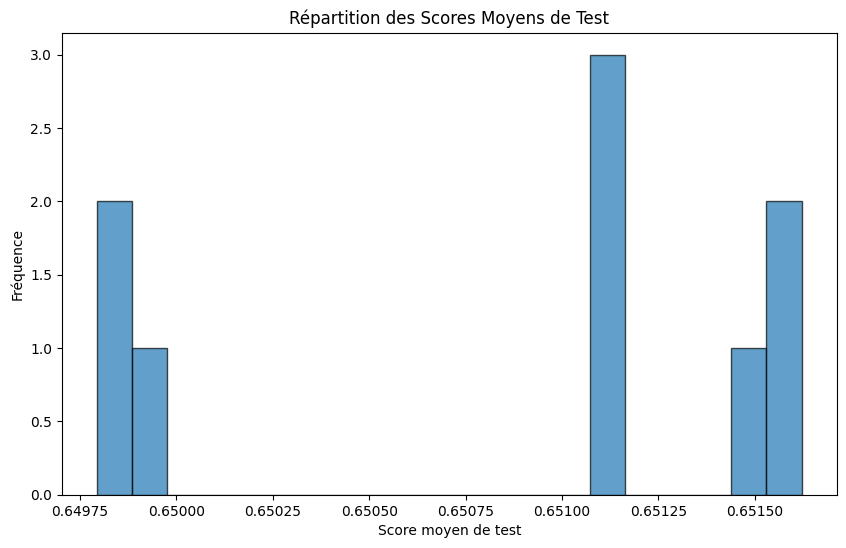

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(resultat_svm_power['mean_test_score'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Score moyen de test')
plt.ylabel('Fréquence')
plt.title('Répartition des Scores Moyens de Test')
plt.show()

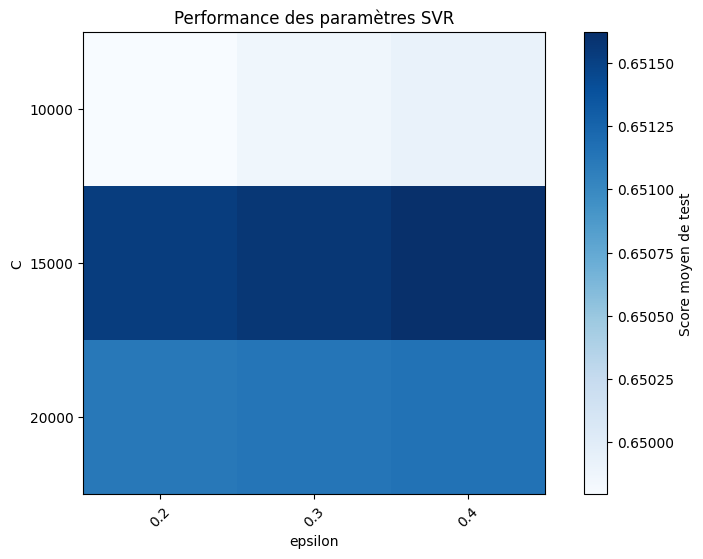

In [ ]:
# Visualisation des résultats de la grille
scores_matrix = resultat_svm_power.pivot_table(index='param_regressor__C', columns='param_regressor__epsilon', values='mean_test_score')

plt.figure(figsize=(10, 6))
plt.title("Performance des paramètres SVR")
plt.xlabel('epsilon')
plt.ylabel('C')
plt.imshow(scores_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.colorbar(label='Score moyen de test')
plt.xticks(ticks=np.arange(len(scores_matrix.columns)), labels=scores_matrix.columns, rotation=45)
plt.yticks(ticks=np.arange(len(scores_matrix.index)), labels=scores_matrix.index)
plt.show()

**Comparaison des modèles en fonction R² Score, MAE et MSE**




In [ ]:

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Définir les préprocesseurs
preprocessor_standard = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(handle_unknown='ignore'), vari_categorielles)
    ]
)

preprocessor_power = ColumnTransformer(
    transformers=[
        ('num', PowerTransformer(), numeric),
        ('cat', OneHotEncoder(handle_unknown='ignore'), vari_categorielles)
    ]
)

# Définir les paramètres pour GridSearchCV
parameters_elastic = {'regressor__alpha': [1e-3, 1e-2, 1e-1, 1e0, 1e1], 'regressor__l1_ratio': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
paramètres_forest = {'regressor__n_estimators': [300, 400], 'regressor__max_depth': [None, 20, 30], 'regressor__min_samples_split': [2, 3], 'regressor__min_samples_leaf': [1, 2]}
paramètres_boosting = {'regressor__n_estimators': [300, 400], 'regressor__learning_rate': [0.15, 0.2], 'regressor__max_depth': [4, 5], 'regressor__min_samples_split': [2, 3, 4]}
paramètres_svr = {'regressor__C': [1000, 10000, 15000, 20000], 'regressor__epsilon': [0.1, 0.2, 0.3, 0.4, 0.5], 'regressor__kernel': ['linear', 'rbf']}

# Définir et ajuster les pipelines GridSearchCV pour chaque modèle
pipeline_elastic_standard = Pipeline([
    ('preprocessor', preprocessor_standard),
    ('regressor', ElasticNet())
])
grid_elastic_standard = GridSearchCV(pipeline_elastic_standard, parameters_elastic, n_jobs=-1, cv=3)
grid_elastic_standard.fit(x_train, y_train)

pipeline_elastic_power = Pipeline([
    ('preprocessor', preprocessor_power),
    ('regressor', ElasticNet())
])
grid_elastic_power = GridSearchCV(pipeline_elastic_power, parameters_elastic, n_jobs=-1, cv=3)
grid_elastic_power.fit(x_train, y_train)

pipeline_forest_standard = Pipeline([
    ('preprocessor', preprocessor_standard),
    ('regressor', RandomForestRegressor())
])
grid_forest_standard = GridSearchCV(pipeline_forest_standard, paramètres_forest, n_jobs=-1, cv=3)
grid_forest_standard.fit(x_train, y_train)

pipeline_forest_power = Pipeline([
    ('preprocessor', preprocessor_power),
    ('regressor', RandomForestRegressor())
])
grid_forest_power = GridSearchCV(pipeline_forest_power, paramètres_forest, n_jobs=-1, cv=3)
grid_forest_power.fit(x_train, y_train)

pipeline_boosting_standard = Pipeline([
    ('preprocessor', preprocessor_standard),
    ('regressor', GradientBoostingRegressor())
])
grid_boosting_standard = GridSearchCV(pipeline_boosting_standard, paramètres_boosting, n_jobs=-1, cv=3)
grid_boosting_standard.fit(x_train, y_train)

pipeline_boosting_power = Pipeline([
    ('preprocessor', preprocessor_power),
    ('regressor', GradientBoostingRegressor())
])
grid_boosting_power = GridSearchCV(pipeline_boosting_power, paramètres_boosting, n_jobs=-1, cv=3)
grid_boosting_power.fit(x_train, y_train)

pipeline_svr_standard = Pipeline([
    ('preprocessor', preprocessor_standard),
    ('regressor', SVR())
])
grid_svr_standard = GridSearchCV(pipeline_svr_standard, paramètres_svr, n_jobs=-1, cv=3)
grid_svr_standard.fit(x_train, y_train)

pipeline_svr_power = Pipeline([
    ('preprocessor', preprocessor_power),
    ('regressor', SVR())
])
grid_svr_power = GridSearchCV(pipeline_svr_power, paramètres_svr, n_jobs=-1, cv=3)
grid_svr_power.fit(x_train, y_train)

# Dictionnaire des objets GridSearchCV
pipelines = {
    'ElasticNet_StandardScaler': grid_elastic_standard,
    'ElasticNet_PowerTransformer': grid_elastic_power,
    'RandomForest_StandardScaler': grid_forest_standard,
    'RandomForest_PowerTransformer': grid_forest_power,
    'GradientBoosting_StandardScaler': grid_boosting_standard,
    'GradientBoosting_PowerTransformer': grid_boosting_power,
    'SVR_StandardScaler': grid_svr_standard,
    'SVR_PowerTransformer': grid_svr_power
}

# Initialiser une liste pour stocker les résultats
results = []

# Calculer les métriques de performance pour chaque modèle
for name, grid in pipelines.items():
    # Meilleur modèle
    best_model = grid.best_estimator_

    # Prédictions sur l'ensemble de test
    y_pred = best_model.predict(x_test)

    # Calcul des métriques
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Ajouter les résultats à la liste
    results.append({
        'Model': name,
        'R² Score': r2,
        'MAE': mae,
        'MSE': mse
    })




In [ ]:
# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results)
display(results_df)

,Model,R² Score,MAE,MSE
0,ElasticNet_StandardScaler,0.468120,138.613497,75035.072426
1,ElasticNet_PowerTransformer,0.260728,149.772497,104292.902626
2,RandomForest_StandardScaler,0.740105,85.576467,36664.706243
3,RandomForest_PowerTransformer,0.728813,84.660861,38257.741265
4,GradientBoosting_StandardScaler,0.762862,86.387796,33454.355218
5,GradientBoosting_PowerTransformer,0.587091,96.230203,58251.161399
6,SVR_StandardScaler,0.575996,89.514670,59816.405269
7,SVR_PowerTransformer,0.611806,109.215122,54764.620246


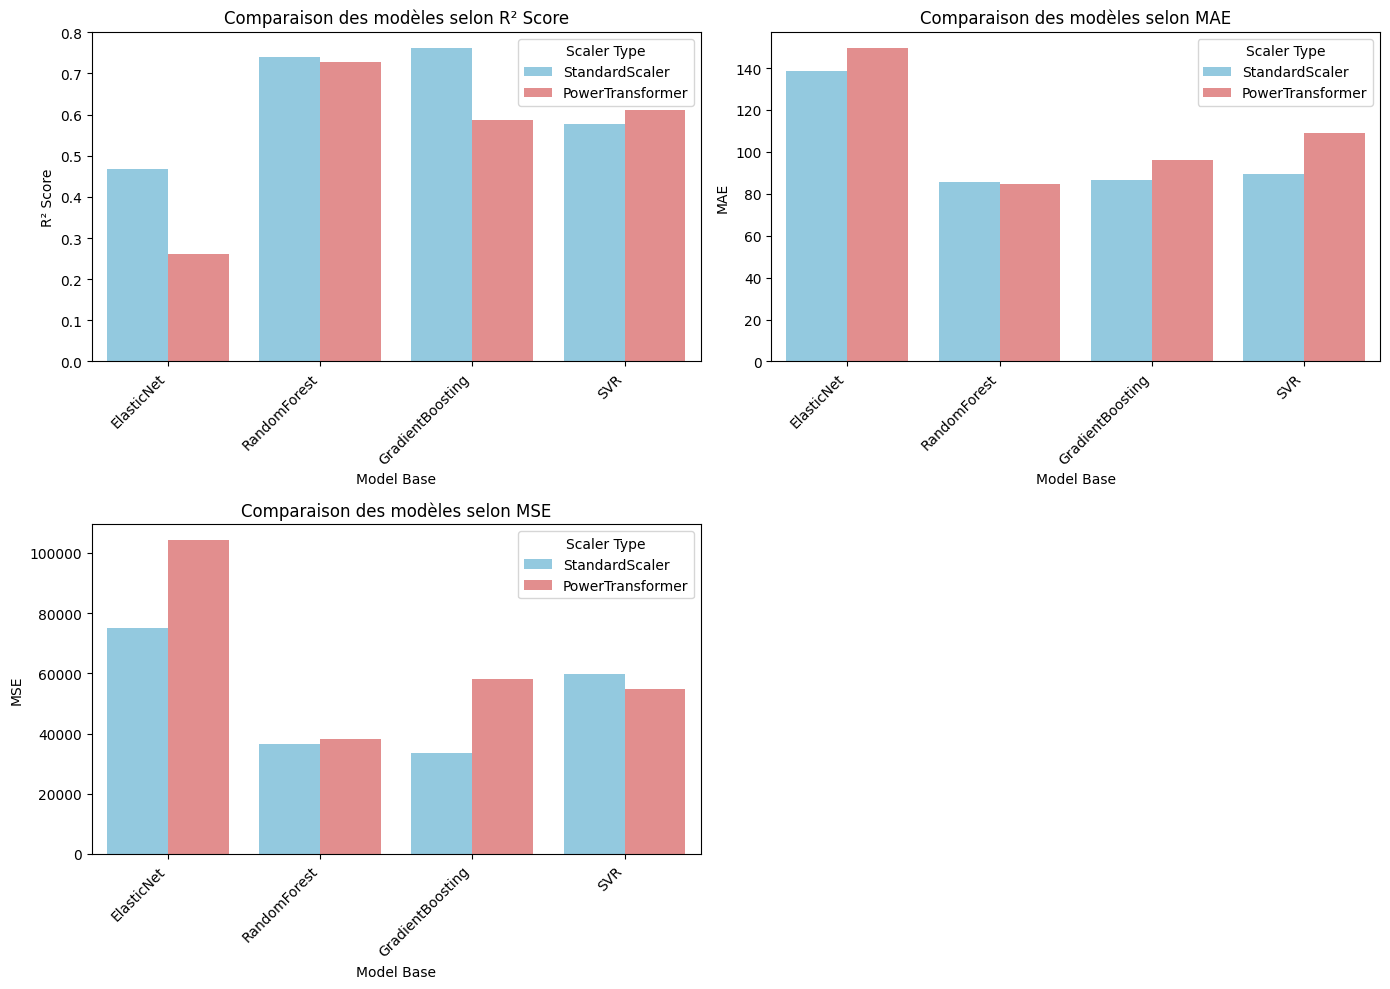

In [ ]:
# Convertir les résultats en DataFrame si ce n'est pas déjà fait
results_df = pd.DataFrame(results)

# Ajouter une colonne pour différencier les modèles 'StandardScaler' et 'PowerTransformer'
results_df['Scaler Type'] = results_df['Model'].apply(lambda x: 'StandardScaler' if 'StandardScaler' in x else 'PowerTransformer')

# Extraire le nom du modèle sans le type de scaler
results_df['Model Base'] = results_df['Model'].apply(lambda x: x.split('_')[0])

# Définir une palette de couleurs
palette = {"StandardScaler": "skyblue", "PowerTransformer": "lightcoral"}

# Définir la taille de la figure
plt.figure(figsize=(14, 10))

# Boucle pour créer un sous-graphe pour chaque métrique
metrics = ['R² Score', 'MAE', 'MSE']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='Model Base', y=metric, hue='Scaler Type', data=results_df, palette=palette)
    plt.title(f'Comparaison des modèles selon {metric}')
    plt.xticks(rotation=45, ha='right')

# Ajuster la mise en page pour que les graphiques ne se chevauchent pas
plt.tight_layout()

# Afficher le graphique
plt.show()

*Comparaison du Score R² entre les Ensembles d'Entraînement et de Test*

In [ ]:
# Récupérer les prédictions pour l'ensemble d'entraînement
y_train_pred = grid.predict(x_train)

# Récupérer les prédictions pour l'ensemble de test
y_test_pred = grid.predict(x_test)

# Calculer les métriques pour l'ensemble d'entraînement
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Calculer les métriques pour l'ensemble de test
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Afficher les résultats
print(f"Performance sur l'ensemble d'entraînement:")
print(f"R2 : {train_r2}")
print(f"MSE : {train_mse}")
print(f"MAE : {train_mae}\n")

print(f"Performance sur l'ensemble de test:")
print(f"R2 : {test_r2}")
print(f"MSE : {test_mse}")
print(f"MAE : {test_mae}")

Performance sur l'ensemble d'entraînement:
R2 : 0.9839285506216571
MSE : 6422.718049051938
MAE : 20.439083366466146

Performance sur l'ensemble de test:
R2 : 0.6118055112513326
MSE : 54764.620245621576
MAE : 109.21512220403517


<ipython-input-404-e35f95c8a496>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ensemble', y='R²', data=r2_df, palette='viridis')


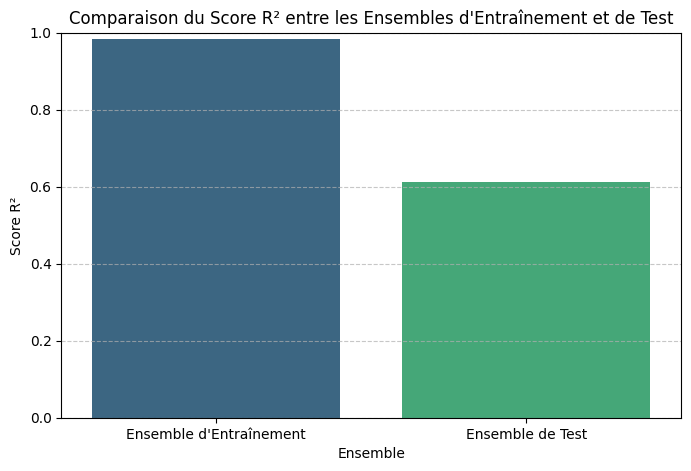

In [ ]:
# Création d'un DataFrame pour le score R²
r2_data = {
    'Ensemble': ['Ensemble d\'Entraînement', 'Ensemble de Test'],
    'R²': [train_r2, test_r2]
}

r2_df = pd.DataFrame(r2_data)

# Création du graphique en barres
plt.figure(figsize=(8, 5))
sns.barplot(x='Ensemble', y='R²', data=r2_df, palette='viridis')

# Personnalisation du graphique
plt.title('Comparaison du Score R² entre les Ensembles d\'Entraînement et de Test')
plt.xlabel('Ensemble')
plt.ylabel('Score R²')
plt.ylim(0, 1)  # R² est généralement entre 0 et 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

*Comparaison des Valeurs Réelles et Prédites*

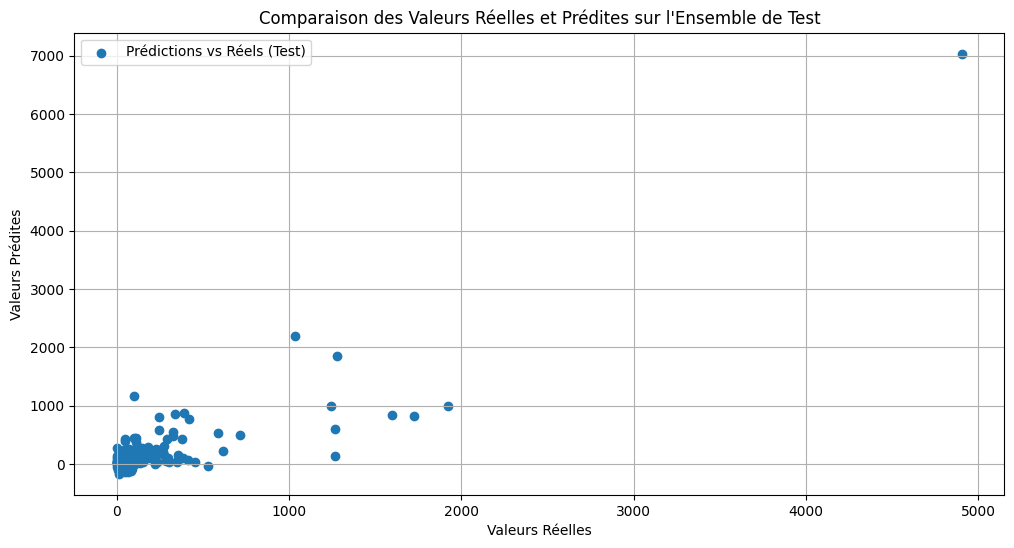

In [ ]:
plt.figure(figsize=(12, 6))

# Graphique de dispersion
plt.scatter(y_test, y_test_pred, label='Prédictions vs Réels (Test)')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Comparaison des Valeurs Réelles et Prédites sur l\'Ensemble de Test')
plt.legend()
plt.grid(True)

plt.show()



*Comparaison des mean_test_score*

In [ ]:
import pandas as pd

# Création des DataFrames de chaque modèle et préprocesseur
meilleurs_elastic_power = resultat_powertrans_elastic.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]].assign(Model="ElasticNet", Preprocessing="PowerTransformer")

meilleurs_elas_StandardScaler = resultat_pipeline_elastic.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]].assign(Model="ElasticNet", Preprocessing="StandardScaler")

meilleurs_forest_power = resultat_forest_power.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]].assign(Model="RandomForest", Preprocessing="PowerTransformer")

meilleurs_forest_standar = resultat_forest_standar.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]].assign(Model="RandomForest", Preprocessing="StandardScaler")

meilleurs_bosting_power = resultat_bosting_power.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]].assign(Model="GradientBoosting", Preprocessing="PowerTransformer")

meilleurs_bosting_standar = resultat_bosting_standar.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]].assign(Model="GradientBoosting", Preprocessing="StandardScaler")

meilleurs_svm_power = resultat_svm_power.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]].assign(Model="SVM", Preprocessing="PowerTransformer")

# Correction de la syntaxe (manque de parenthèse)
meilleurs_svm_standar = resultat_svm_standar.sort_values(by="rank_test_score").head(3)[[
    "mean_test_score", "mean_train_score"
]].assign(Model="SVM", Preprocessing="StandardScaler")

# Combiner tous les DataFrames
comparaison_df = pd.concat([
    meilleurs_elastic_power,
    meilleurs_elas_StandardScaler,
    meilleurs_forest_power,
    meilleurs_forest_standar,
    meilleurs_bosting_power,
    meilleurs_bosting_standar,
    meilleurs_svm_power,
    meilleurs_svm_standar
], ignore_index=True)

# Afficher le tableau de comparaison
display(comparaison_df)



,mean_test_score,mean_train_score,Model,Preprocessing
0,0.405097,0.628452,ElasticNet,PowerTransformer
1,0.405090,0.628885,ElasticNet,PowerTransformer
2,0.404973,0.627982,ElasticNet,PowerTransformer
3,0.450312,0.755063,ElasticNet,StandardScaler
4,0.426447,0.762678,ElasticNet,StandardScaler
5,0.422040,0.761081,ElasticNet,StandardScaler
6,0.542161,0.938864,RandomForest,PowerTransformer
7,0.556779,0.934745,RandomForest,StandardScaler
8,0.548294,0.937738,RandomForest,StandardScaler
9,0.548002,0.939476,RandomForest,StandardScaler


*comparaison des mean_train_score*

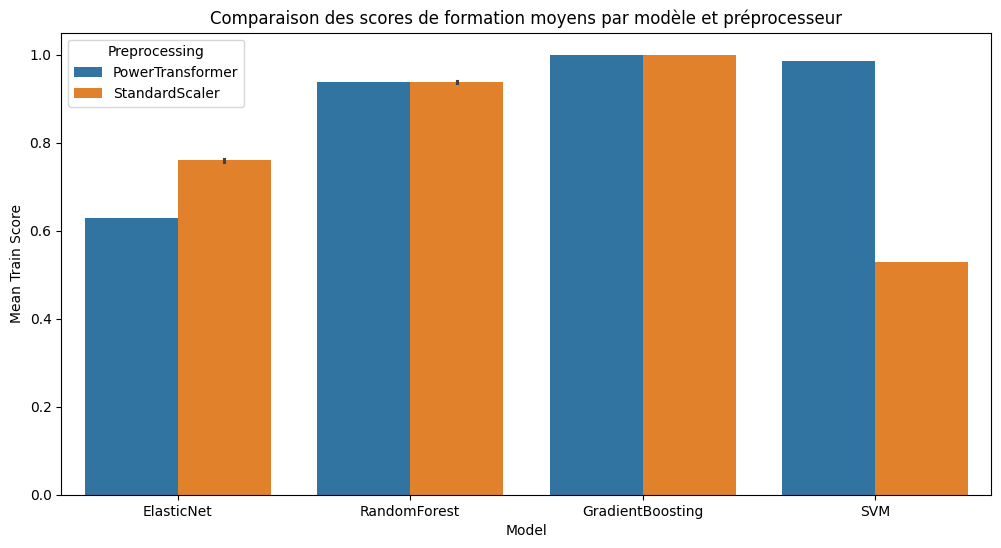

In [ ]:
# Visualisation avec bar plot pour mean_train_score
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="mean_train_score", hue="Preprocessing", data=comparaison_df)
plt.title("Comparaison des scores de formation moyens par modèle et préprocesseur")
plt.ylabel("Mean Train Score")
plt.xlabel("Model")
plt.legend(title="Preprocessing")
plt.show()

*Comparaisons des Mean Test Score*

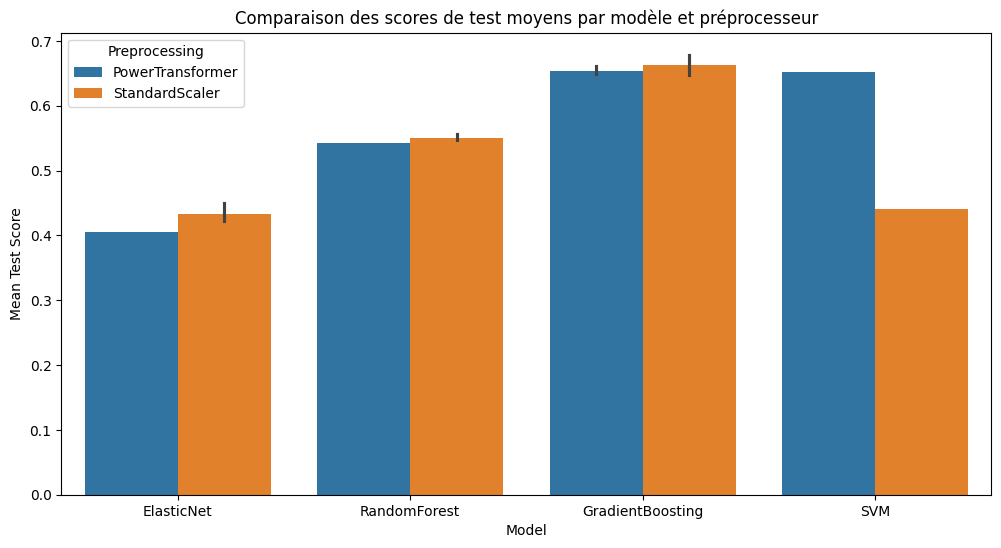

In [ ]:

# Visualisation avec bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="mean_test_score", hue="Preprocessing", data=comparaison_df)
plt.title("Comparaison des scores de test moyens par modèle et préprocesseur")
plt.ylabel("Mean Test Score")
plt.xlabel("Model")
plt.legend(title="Preprocessing")
plt.show()

### *Comparaison heatmap des scores de test moyens*

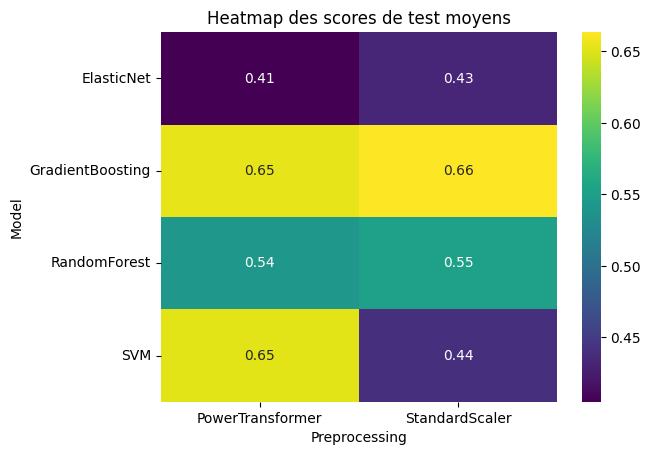

In [ ]:
pivot_df = comparaison_df.pivot_table(
    index="Model", columns="Preprocessing", values="mean_test_score"
)
sns.heatmap(pivot_df, annot=True, cmap="viridis")
plt.title("Heatmap des scores de test moyens")
plt.xlabel("Preprocessing")
plt.ylabel("Model")
plt.show()

## **Tester l'importance des variables**

**SHAP**

*Nous allons procedé sur le meilleur model*

* Nous permet de connaitre l'importance des variables **(importance glogale)**
* une prediction au hasard c'est a dire une seule des lignes et on fait la prediction et il est capable de dire que tel ou tel variable qui contribué fortement ou non cette prediction **(importance locale)**

In [ ]:

# Extraire le meilleur modèle
best_model = grid.best_estimator_

# Prétraiter les données
x_train_preprocessed = best_model.named_steps['preprocessor'].fit_transform(x_train)
x_test_preprocessed = best_model.named_steps['preprocessor'].transform(x_test)

In [ ]:
# Récupérer les noms des caractéristiques après prétraitement
feature_names = best_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
num_features = x_train[numeric].columns
all_feature_names = np.concatenate([num_features, feature_names])




In [ ]:
# Utiliser un échantillon résumé des données de fond pour SHAP
background = shap.sample(x_train_preprocessed, 100)

# Créer l'explainer SHAP
explainer = shap.KernelExplainer(best_model.named_steps['regressor'].predict, background)

# Calculer les valeurs SHAP
shap_values = explainer.shap_values(x_test_preprocessed, nsamples=100)



  0%|          | 0/288 [00:00<?, ?it/s]

### *Visualisation de l'importance locale*

In [ ]:
# Sélectionner une ligne spécifique à expliquer
shap.initjs()
row_to_show = 5
data_for_prediction = x_test_preprocessed[row_to_show].toarray() if hasattr(x_test_preprocessed[row_to_show], "toarray") else x_test_preprocessed[row_to_show]

In [ ]:
# Visualiser les valeurs SHAP pour la prédiction
shap.force_plot(explainer.expected_value, shap_values[row_to_show], data_for_prediction)

In [ ]:
# Créer un objet force_plot avec les noms de caractéristiques
force_plot = shap.force_plot(explainer.expected_value, shap_values[row_to_show], data_for_prediction, feature_names=all_feature_names)

In [ ]:
# Sauvegarder et télécharger le fichier HTML
shap.save_html("/content/shap_force_plot.html", force_plot)
from google.colab import files
files.download('/content/shap_force_plot.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### *Visualisation de l'importance globale des caractéristiques*

In [ ]:
# Créer une DataFrame avec les valeurs SHAP
shap_df = pd.DataFrame(shap_values, columns=all_feature_names)

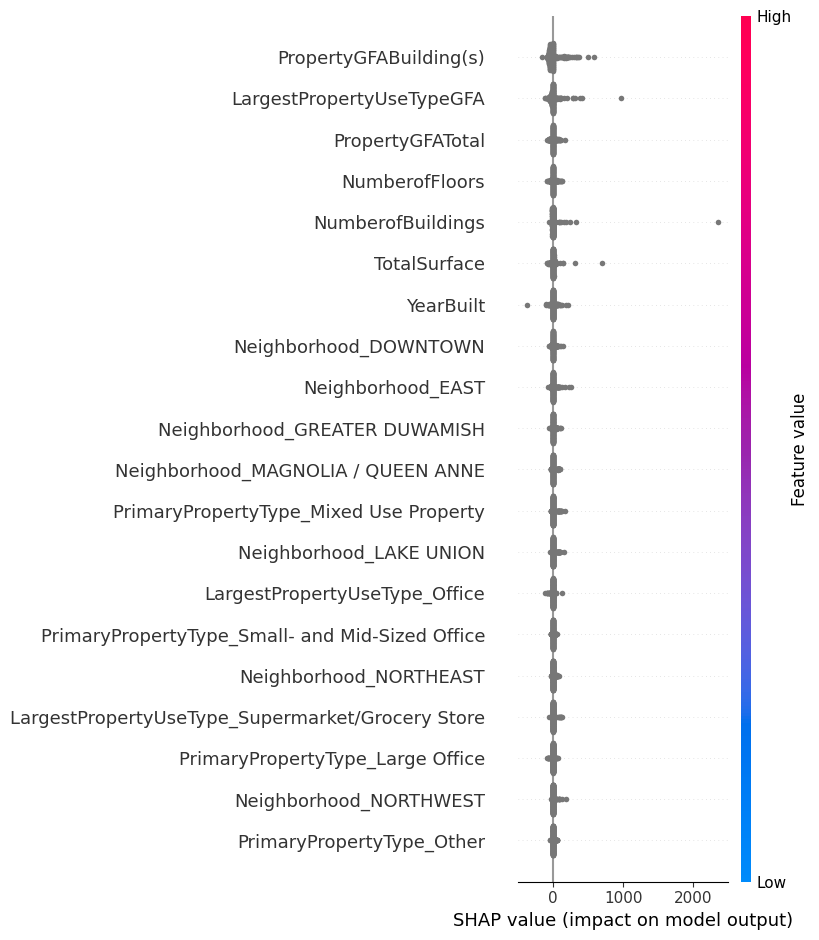

In [ ]:


# Tracer le résumé des valeurs SHAP
shap.summary_plot(shap_values, x_test_preprocessed, feature_names=all_feature_names)

### *Graphique des valeurs SHAP (SHAP Value Plot) importance globale*

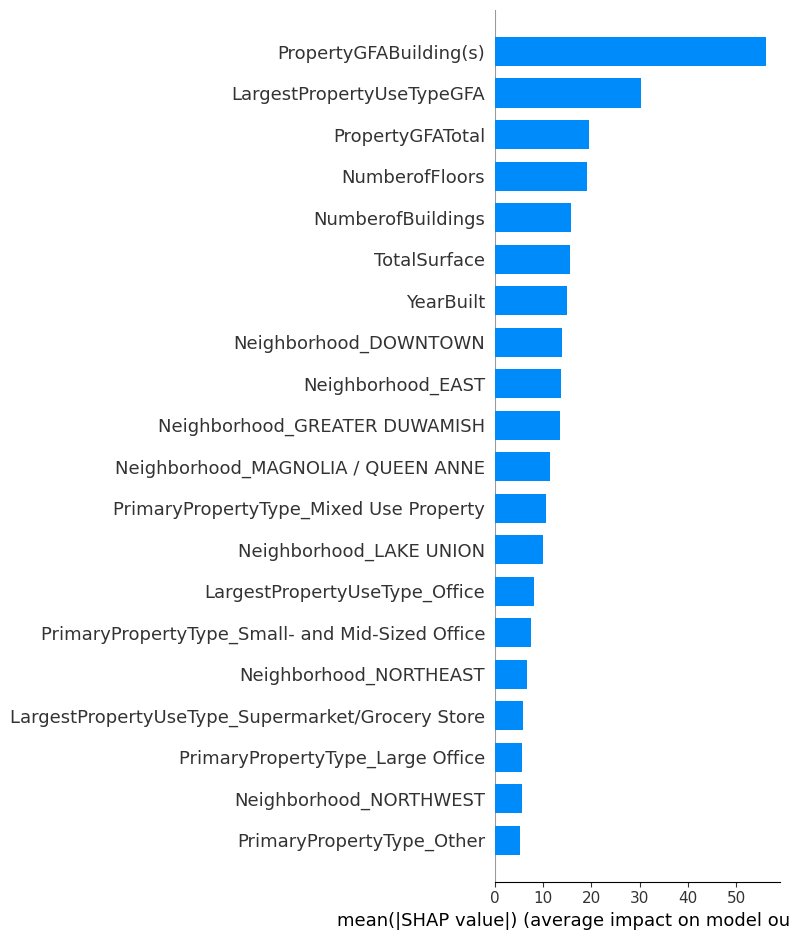

In [ ]:
shap.summary_plot(shap_values, x_test_preprocessed, plot_type="bar", feature_names=all_feature_names)


## **Calcul de l'erreur sur l'ensemble de test**

In [ ]:
grid.best_estimator_.score(x_test, y_test)


0.6118055112513326

## Affiché les valeurs predictes

In [ ]:
# Obtenir les prédictions pour l'ensemble de test
y_pred = grid.predict(x_test)

In [ ]:
y_pred

array([ 1.43264735e+02,  2.73020060e+01, -1.64044057e+01,  1.12063194e+01,
        6.28288484e+00,  6.68859983e+01,  1.22424718e+02,  2.68970855e+02,
        5.45651636e+01,  3.07523401e+02,  8.85081751e+00,  1.33076591e+02,
        2.42052452e+02,  3.71126620e+01,  5.12329690e+00,  1.14383713e+01,
        4.32564183e+01,  1.96079802e+02,  1.40397971e+02,  1.09321509e+02,
        4.42139520e+02,  8.40537079e+00,  1.63406469e+01,  1.40304266e+02,
        1.18381936e+02,  4.53599560e+02,  2.91748939e+01,  3.07879125e+01,
        1.87487339e+02,  4.51165773e+01,  2.42813566e+01,  3.32481370e+01,
        6.93623114e+01, -1.10026884e+01,  8.87497416e+01,  4.47250646e+01,
        1.21935826e+02,  2.77082375e+01,  4.11732787e+01, -4.95189581e+01,
        2.86078601e+02,  2.17399627e+01,  5.67038847e+01,  4.43352272e+01,
       -1.35855198e+01,  4.25442528e+02,  4.11206575e+01, -4.09002090e+00,
        1.23186572e+02,  1.37156655e+02, -7.78605412e+01,  4.30194990e+01,
        1.41357220e+02,  